In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/DataSet.csv')

# Now you can work with the DataFrame 'df'
print(df.head())


Mounted at /content/drive
   Age Gender Occupation      Relation with family   \
0   22   Male      Study     Very good relationship   
1   24   Male      Study          Good relationship   
2   20   Male      Study          Good relationship   
3   24   Male      Study  Satisfactory relationship   
4   20   Male      Study     Very good relationship   

  Addicted members in family Physical changes Noticeable  \
0                         No               Not noticable   
1                         No               Not noticable   
2                         No               Not noticable   
3                         No                   Noticable   
4                         No               Not noticable   

  Change in speech patterns Change in sleeping patterns  \
0                        No              Did not change   
1                        No              Did not change   
2                        No              Did not change   
3                       Yes                 Ha

In [3]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Handling imbalance with SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop("Drug addicted", axis=1)  # Replace with correct column name
y = df["Drug addicted"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Data after SMOTE:", X_train_smote.shape, y_train_smote.shape)


Data after SMOTE: (698, 29) (698,)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# List of models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train model
    y_pred = model.predict(X_test)  # Test model
    acc = accuracy_score(y_test, y_pred)  # Compute accuracy
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")


Random Forest Accuracy: 0.96
Logistic Regression Accuracy: 0.96
Support Vector Machine Accuracy: 0.96
K-Nearest Neighbors Accuracy: 0.96
Decision Tree Accuracy: 0.94


In [5]:
# Display the best model
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with Accuracy: {accuracies[best_model_name]:.2f}")


Best Model: Random Forest with Accuracy: 0.96


In [6]:
import joblib

# Save the best model
joblib.dump(best_model, "best_drug_model.pkl")
print("Model saved as best_drug_model.pkl")


Model saved as best_drug_model.pkl


In [7]:
# Function for prediction
def predict_addiction(features):
    """
    Predict if a person is a drug addict or not.
    features: List of inputs matching the order of X columns.
    """
    # Convert features into DataFrame format, ensuring the correct number of features
    # --- Changed line: Adjust features to match the number of columns ---
    if len(features) != len(X.columns):
        raise ValueError(f"Incorrect number of features. Expected {len(X.columns)}, got {len(features)}.")

    feature_df = pd.DataFrame([features], columns=X.columns)
    prediction = loaded_model.predict(feature_df)[0]  # Predict
    prediction_proba = loaded_model.predict_proba(feature_df)[0]  # Probabilities
    return "Drug Addict" if prediction == 1 else "Not Drug Addict", prediction_proba

# Example input for prediction
# --- Changed line:  Adjust example_input to have 29 elements ---
example_input = [25, 0, 1, 2, 1, 0, 3, 4, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]  # Replace with actual input values
result, probability = predict_addiction(example_input)
print("Prediction:", result)
print("Probability:", probability)

NameError: name 'loaded_model' is not defined

In [8]:

df = pd.read_csv('/content/drive/My Drive/DataSet.csv')

# Now you can work with the DataFrame 'df'
#print(df.head())
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("First Few Rows:\n", df.head())


Dataset Shape: (604, 30)
Column Names: ['Age', 'Gender', 'Occupation', 'Relation with family ', 'Addicted members in family', 'Physical changes Noticeable', 'Change in speech patterns', 'Change in sleeping patterns', 'Overeating or food craving', 'Unexplained needles or injection sites in body', 'Unusual smells from body', 'Frequent unexplained illnesses', 'Unpredictable behavior changes', 'Engaging in risky sexual behavior', 'Noticeable decline in memory recall', 'Unexpected loss of control', 'Neglected responsibilities', 'Careless of the future', 'Loss of interest in hobbies', 'Aggressively in society', 'Unexplained changes in social circles', 'Has a drug addicted friends', 'Frequent asking for money without proper reasons', 'Tension or Depression', 'Failure in life', 'Ever breakup in relationship', 'Smoking', 'Live with someone who has a habit of using drug', 'Motive about drug', 'Drug addicted']
First Few Rows:
    Age Gender Occupation      Relation with family   \
0   22   Male  

In [9]:
print("Shape of the dataset:", df.shape)  # Check the number of rows and columns
print("Column names:", df.columns)  # Verify column names

Shape of the dataset: (604, 30)
Column names: Index(['Age', 'Gender', 'Occupation', 'Relation with family ',
       'Addicted members in family', 'Physical changes Noticeable',
       'Change in speech patterns', 'Change in sleeping patterns',
       'Overeating or food craving',
       'Unexplained needles or injection sites in body',
       'Unusual smells from body', 'Frequent unexplained illnesses',
       'Unpredictable behavior changes', 'Engaging in risky sexual behavior',
       'Noticeable decline in memory recall', 'Unexpected loss of control',
       'Neglected responsibilities', 'Careless of the future',
       'Loss of interest in hobbies', 'Aggressively in society',
       'Unexplained changes in social circles', 'Has a drug addicted friends',
       'Frequent asking for money without proper reasons',
       'Tension or Depression', 'Failure in life',
       'Ever breakup in relationship', 'Smoking',
       'Live with someone who has a habit of using drug', 'Motive about 

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle  # To load the saved model and label encoders

# Load the trained model and label encoders
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)  # Assign the model to 'loaded_model'

with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)

# Preprocess the new input data
def preprocess_data(new_data):
    """
    Preprocesses the input data for prediction, applying the same transformations
    as used during training.

    Args:
        new_data: The input data (e.g., pandas DataFrame) to preprocess.

    Returns:
        The preprocessed input data.
    """

    categorical_columns = ['Gender', 'Occupation', 'Relation with family ', 'Addicted members in family', 'Motive about drug']  # List of your categorical columns
    for column in categorical_columns:
        # Get the LabelEncoder object for this column
        le = label_encoders.get(column)  # Use .get() to safely retrieve the encoder
        if le is not None:  # Check if an encoder exists for the column
            # Handle unknown values in the new data (using 'Unknown' or another strategy)
            known_classes = le.classes_
            new_data[column] = new_data[column].apply(lambda x: x if x in known_classes else known_classes[0])

            # Transform the column
            new_data[column] = le.transform(new_data[column])
        else:
            print(f"Warning: No LabelEncoder found for column '{column}'. Skipping transformation.")

    return new_data

# Example input data for prediction
new_data = pd.DataFrame([[
    28, 'Male', 'Student', 'Good', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
    'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
    'Yes', 'No', 'Yes', 'Peer Pressure' # Removed 'Drug addicted' column
]], columns=[
    'Age', 'Gender', 'Occupation', 'Relation with family ', 'Addicted members in family',
    'Physical changes Noticeable', 'Change in speech patterns', 'Change in sleeping patterns',
    'Overeating or food craving', 'Unexplained needles or injection sites in body',
    'Unusual smells from body', 'Frequent unexplained illnesses', 'Unpredictable behavior changes',
    'Engaging in risky sexual behavior', 'Noticeable decline in memory recall',
    'Unexpected loss of control', 'Neglected responsibilities', 'Careless of the future',
    'Loss of interest in hobbies', 'Aggressively in society', 'Unexplained changes in social circles',
    'Has a drug addicted friends', 'Frequent asking for money without proper reasons',
    'Tension or Depression', 'Failure in life', 'Ever breakup in relationship', 'Smoking',
    'Live with someone who has a habit of using drug', 'Motive about drug' # Removed 'Drug addicted' column
])


# Preprocess the data before prediction
new_data_processed = preprocess_data(new_data)

# Make predictions using the loaded model
# --- Changed line: Call predict on the loaded_model variable ---
prediction = loaded_model.predict(new_data_processed)
print(f"Prediction (0 = Not Addicted, 1 = Addicted): {prediction[0]}")


AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [18]:
from google.colab import files

# Save the label_encoders.pkl file
import pickle

# Assuming 'label_encoders' is your LabelEncoder object
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

# Download the file
files.download('label_encoders.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
print(df['Drug addicted'].unique())


['No' 'Yes']


In [20]:
# Map target values to binary
df['Drug addicted'] = df['Drug addicted'].map({'Yes': 1, 'No': 0})  # Adjust mapping as per your dataset
print(df['Drug addicted'].unique())


[0 1]


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'Relation with family ', 'Motive about drug']  # Update with actual categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())  # Verify encoding


   Age  Gender  Occupation  Relation with family  Addicted members in family  \
0   22       1           3                      3                         No   
1   24       1           3                      0                         No   
2   20       1           3                      0                         No   
3   24       1           3                      2                         No   
4   20       1           3                      3                         No   

  Physical changes Noticeable Change in speech patterns  \
0               Not noticable                        No   
1               Not noticable                        No   
2               Not noticable                        No   
3                   Noticable                       Yes   
4               Not noticable                        No   

  Change in sleeping patterns Overeating or food craving  \
0              Did not change                         No   
1              Did not change               

In [22]:
print(df.isnull().sum())  # Check for missing values
# Fill numerical missing values with mean for only numerical columns
for column in df.select_dtypes(include='number').columns:
    df[column].fillna(df[column].mean(), inplace=True)

Age                                                 0
Gender                                              0
Occupation                                          0
Relation with family                                0
Addicted members in family                          0
Physical changes Noticeable                         0
Change in speech patterns                           0
Change in sleeping patterns                         0
Overeating or food craving                          0
Unexplained needles or injection sites in body      0
Unusual smells from body                            0
Frequent unexplained illnesses                      0
Unpredictable behavior changes                      0
Engaging in risky sexual behavior                   0
Noticeable decline in memory recall                 0
Unexpected loss of control                          0
Neglected responsibilities                          0
Careless of the future                              0
Loss of interest in hobbies 

<ipython-input-22-8d01b97ce33f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [23]:
X = df.drop('Drug addicted', axis=1)  # Features
y = df['Drug addicted']  # Target


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ... (Rest of your code) ...

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes after encoding categorical columns
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_smote.shape, y_train_smote.shape)


ValueError: could not convert string to float: 'No'

In [25]:
print("Missing values in y:", y.isnull().sum())  # Check overall target for NaN
print("Missing values in y_train:", y_train.isnull().sum())  # Check training target for NaN


Missing values in y: 0
Missing values in y_train: 0


In [26]:
# Drop rows where the target variable is NaN
X_train, y_train = X_train[y_train.notna()], y_train[y_train.notna()]
if not y_train.empty:
    # If not empty, fill NaN values with the mode
    y_train.fillna(y_train.mode()[0], inplace=True)


In [27]:
# Verify no missing values remain
print("Missing values in y_train after handling:", y_train.isnull().sum())

# Proceed with SMOTE
from imblearn.over_sampling import SMOTE

# Check if X_train and y_train are empty
if X_train.empty or y_train.empty:
    print("X_train or y_train is empty after NaN handling. Cannot apply SMOTE.")
else:
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print("Before SMOTE:", X_train.shape, y_train.shape)
    print("After SMOTE:", X_train_smote.shape, y_train_smote.shape)

Missing values in y_train after handling: 0


ValueError: could not convert string to float: 'No'

In [29]:
# Check and handle missing values in X_train
print("Missing values in X_train:", X_train.isnull().sum().sum())  # Total missing values

# Handle missing values (fill or drop based on your strategy)
X_train.fillna(X_train.mean(), inplace=True)  # Fill numerical columns with mean


Missing values in X_train: 0


TypeError: Could not convert ['NoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNo'
 'Not noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNoticableNoticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNoticableNot noticableNoticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNoticableNoticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNoticableNoticableNoticableNoticableNot noticableNot noticableNot noticableNoticableNoticableNoticableNoticableNoticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNoticableNoticableNoticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNoticableNoticableNoticableNot noticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNoticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNoticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNoticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNoticableNoticableNoticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNoticableNoticableNot noticableNot noticableNot noticableNoticableNot noticableNot noticableNoticableNot noticableNot noticableNot noticableNot noticableNot noticableNoticableNoticableNot noticableNot noticableNoticableNot noticableNot noticable'
 'NoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesYesYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesYesYesNoNoYesNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesYesYesYesYesNoYesNoNoYesYesYesNoNoYesYesYesNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoYesYesNoNoYesYesNoNoNoYesYesNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNo'
 'Has changedDid not changeHas changedDid not changeHas changedHas changedHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeHas changedDid not changeHas changedDid not changeDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeHas changedHas changedDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeHas changedHas changedHas changedDid not changeHas changedDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeHas changedHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeHas changedHas changedHas changedHas changedDid not changeDid not changeDid not changeDid not changeHas changedHas changedHas changedDid not changeHas changedDid not changeHas changedDid not changeDid not changeHas changedDid not changeDid not changeHas changedHas changedDid not changeDid not changeHas changedHas changedDid not changeHas changedHas changedDid not changeHas changedHas changedDid not changeDid not changeHas changedDid not changeHas changedHas changedHas changedHas changedDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeHas changedDid not changeHas changedDid not changeDid not changeHas changedDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeHas changedDid not changeDid not changeHas changedHas changedHas changedDid not changeHas changedDid not changeDid not changeHas changedDid not changeDid not changeDid not changeHas changedDid not changeHas changedHas changedHas changedDid not changeDid not changeHas changedDid not changeHas changedDid not changeDid not changeHas changedDid not changeDid not changeHas changedDid not changeHas changedDid not changeHas changedDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedHas changedHas changedHas changedDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedHas changedHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeHas changedDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeHas changedDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedHas changedDid not changeDid not changeHas changedHas changedHas changedHas changedDid not changeDid not changeDid not changeDid not changeHas changedHas changedHas changedHas changedHas changedDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeHas changedHas changedHas changedHas changedDid not changeDid not changeHas changedHas changedDid not changeDid not changeDid not changeHas changedDid not changeDid not changeDid not changeDid not changeDid not changeHas changedDid not changeDid not changeHas changedDid not changeHas changed'
 'YesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoYesYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoYesYesYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesYesYesNoNoYesNoNoNoNoYesYesNoNoNoYesYesYesNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoYesYesYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoYes'
 'Not noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableYes noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticable'
 'NoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesYesNoYesNoNoNoYesYesYesYesYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesYesYesNoYesNoYesYesNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesNoYesNoNoYesNoNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNo'
 'NeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverContinouslyContinouslyContinouslyNeverNeverNeverContinouslyContinouslyNeverContinouslyContinouslyNeverNeverContinouslyContinouslyNeverNeverNeverNeverContinouslyNeverNeverNeverContinouslyContinouslyContinouslyNeverNeverNeverNeverNeverNeverNeverContinouslyNeverContinouslyNeverContinouslyContinouslyContinouslyContinouslyNeverNeverNeverNeverContinouslyNeverNeverContinouslyNeverNeverContinouslyContinouslyNeverNeverNeverContinouslyContinouslyNeverNeverNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverNeverNeverNeverNeverNeverContinouslyContinouslyNeverContinouslyNeverNeverContinouslyContinouslyNeverNeverNeverNeverNeverNeverContinouslyNeverContinouslyNeverNeverContinouslyNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverContinouslyContinouslyNeverContinouslyNeverContinouslyContinouslyContinouslyContinouslyNeverContinouslyContinouslyContinouslyContinouslyContinouslyContinouslyNeverNeverNeverNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverNeverNeverNeverContinouslyNeverContinouslyNeverNeverContinouslyNeverContinouslyNeverContinouslyContinouslyContinouslyContinouslyNeverNeverNeverNeverNeverContinouslyNeverNeverNeverNeverNeverContinouslyContinouslyNeverNeverContinouslyNeverNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverContinouslyNeverNeverContinouslyContinouslyNeverNeverNeverNeverNeverContinouslyNeverNeverNeverNeverContinouslyContinouslyNeverNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverContinouslyNeverNeverContinouslyContinouslyContinouslyNeverNeverNeverNeverNeverNeverContinouslyNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverNeverContinouslyContinouslyContinouslyNeverContinouslyNeverNeverNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverContinouslyNeverNeverNeverNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverNeverNeverContinouslyContinouslyNeverContinouslyNeverNeverNeverNeverNeverNeverContinouslyNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverNeverContinouslyContinouslyNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverContinouslyContinouslyContinouslyContinouslyNeverNeverNeverContinouslyNeverNeverContinouslyNeverContinouslyNeverNeverNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverNeverContinouslyContinouslyContinouslyContinouslyNeverNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverNeverNeverNeverContinouslyNeverNeverNeverNeverContinouslyContinouslyNeverNeverNeverNeverNeverNeverNeverNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverNeverContinouslyNeverNeverContinouslyNeverNeverNeverNeverNeverNeverContinouslyContinouslyNeverContinouslyNeverNeverNeverNeverNeverNeverContinouslyNeverContinouslyNeverNeverNeverNeverContinouslyContinouslyContinouslyContinouslyNeverNeverNeverNeverContinouslyNeverNeverContinouslyNeverContinouslyNeverContinouslyContinouslyContinouslyNeverNeverNeverNeverContinouslyNeverNeverContinouslyNeverContinouslyContinouslyNeverNeverNeverNever'
 'RegularNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverRegularRegularNeverNeverNeverNeverRegularNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverRegularRegularRegularRegularNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverRegularNeverNeverRegularNeverRegularRegularRegularRegularNeverNeverNeverRegularNeverNeverNeverNeverRegularNeverNeverRegularNeverNeverNeverRegularNeverNeverNeverRegularNeverNeverRegularNeverRegularNeverNeverRegularNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverRegularRegularRegularNeverNeverNeverNeverNeverNeverNeverRegularNeverRegularRegularRegularNeverNeverRegularNeverNeverNeverNeverNeverNeverRegularNeverRegularNeverNeverNeverNeverNeverNeverNeverRegularRegularNeverRegularRegularNeverNeverRegularNeverRegularRegularNeverRegularRegularRegularNeverNeverRegularNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverRegularRegularNeverRegularRegularNeverNeverNeverNeverNeverNeverNeverNeverNeverRegularRegularRegularNeverNeverNeverNeverRegularNeverRegularRegularNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverRegularNeverRegularNeverRegularNeverNeverRegularNeverNeverRegularNeverNeverRegularNeverNeverNeverNeverNeverNeverRegularNeverNeverRegularNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverRegularRegularNeverNeverNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverRegularNeverNeverNeverRegularNeverNeverNeverNeverRegularRegularNeverNeverRegularRegularNeverRegularRegularRegularNeverNeverNeverNeverRegularNeverNeverNeverNeverRegularNeverNeverRegularNeverRegularNeverRegularNeverNeverRegularRegularNeverNeverNeverRegularNeverNeverNeverRegularNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverNeverRegularNeverRegularNeverNeverNeverNeverNeverRegularNeverNeverNeverRegularNeverNeverNeverNeverNeverRegularNeverNeverRegularRegularNeverNeverRegularRegularRegularNeverNeverRegularRegularRegularNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverNeverRegularRegularRegularRegularNeverRegularNeverNeverNeverNeverNeverRegularRegularNeverNeverRegularNeverNeverNeverRegularNeverNeverRegularRegularNeverNeverRegularNeverNeverNeverNeverRegularNeverNeverNeverNeverNeverNeverNeverRegularRegularNeverRegularNeverNever'
 'NoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesNoYesNoNoNoYesYesNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoYesYesYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoYesNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoYesYesYesNoYesNoYesYesNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoYesYesNoNoNoYesNoNoYesYesNoYesYesNoNoNoNoNoYesYesNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoYesYesYesNo'
 'Yes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableYes noticableYes noticableNot noticableYes noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableNot noticableYes noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableYes noticableYes noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableYes noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableYes noticableYes noticableYes noticableYes noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableYes noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableYes noticableYes noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableNot noticableNot noticableNot noticableYes noticableNot noticableNot noticableNot noticableYes noticableNot noticableYes noticableNot noticableYes noticableNot noticableYes noticable'
 'SometimesNeverNeverSometimesAlwaysSometimesAlwaysNeverSometimesAlwaysNeverNeverAlwaysAlwaysNeverNeverNeverSometimesNeverSometimesSometimesAlwaysSometimesSometimesNeverSometimesAlwaysNeverNeverSometimesAlwaysNeverNeverSometimesNeverNeverNeverNeverSometimesSometimesAlwaysNeverNeverAlwaysSometimesNeverNeverSometimesNeverAlwaysSometimesSometimesAlwaysSometimesAlwaysNeverSometimesAlwaysNeverNeverNeverNeverSometimesSometimesNeverNeverNeverSometimesNeverAlwaysAlwaysSometimesSometimesNeverSometimesSometimesAlwaysSometimesSometimesSometimesNeverSometimesNeverNeverNeverSometimesSometimesAlwaysNeverSometimesNeverSometimesSometimesSometimesNeverNeverSometimesSometimesSometimesSometimesSometimesSometimesAlwaysAlwaysNeverSometimesNeverNeverSometimesNeverNeverSometimesNeverNeverAlwaysNeverNeverNeverSometimesNeverSometimesAlwaysSometimesSometimesSometimesNeverSometimesSometimesAlwaysSometimesSometimesSometimesSometimesSometimesAlwaysNeverAlwaysNeverSometimesNeverAlwaysNeverSometimesSometimesNeverSometimesSometimesAlwaysSometimesNeverNeverSometimesNeverSometimesSometimesNeverSometimesNeverSometimesAlwaysSometimesNeverSometimesSometimesSometimesNeverAlwaysSometimesNeverNeverNeverAlwaysAlwaysNeverSometimesNeverNeverSometimesNeverNeverAlwaysAlwaysNeverNeverAlwaysNeverSometimesSometimesNeverNeverNeverSometimesSometimesNeverAlwaysSometimesSometimesAlwaysAlwaysAlwaysNeverNeverAlwaysAlwaysAlwaysAlwaysAlwaysNeverAlwaysNeverNeverAlwaysNeverSometimesAlwaysSometimesNeverSometimesNeverNeverNeverSometimesNeverAlwaysNeverSometimesSometimesNeverNeverNeverSometimesNeverSometimesNeverNeverSometimesNeverNeverNeverAlwaysSometimesAlwaysNeverNeverNeverAlwaysNeverNeverSometimesSometimesSometimesNeverSometimesNeverSometimesAlwaysNeverNeverSometimesAlwaysAlwaysSometimesAlwaysNeverNeverNeverAlwaysNeverAlwaysAlwaysSometimesNeverNeverSometimesAlwaysNeverSometimesNeverNeverSometimesSometimesAlwaysNeverNeverSometimesNeverSometimesSometimesSometimesSometimesSometimesSometimesNeverNeverAlwaysAlwaysNeverNeverNeverSometimesNeverAlwaysAlwaysNeverNeverSometimesSometimesAlwaysAlwaysNeverNeverNeverSometimesAlwaysSometimesSometimesNeverNeverSometimesSometimesAlwaysNeverSometimesAlwaysAlwaysAlwaysSometimesSometimesAlwaysSometimesNeverAlwaysSometimesSometimesSometimesNeverAlwaysNeverSometimesNeverSometimesSometimesSometimesSometimesAlwaysNeverSometimesNeverSometimesAlwaysAlwaysNeverAlwaysSometimesNeverNeverSometimesNeverNeverNeverSometimesSometimesSometimesAlwaysAlwaysNeverNeverNeverSometimesNeverNeverNeverAlwaysNeverSometimesNeverNeverNeverSometimesSometimesNeverSometimesNeverSometimesSometimesNeverAlwaysNeverSometimesAlwaysSometimesAlwaysAlwaysNeverNeverSometimesAlwaysNeverNeverNeverAlwaysNeverNeverAlwaysSometimesAlwaysSometimesSometimesSometimesAlwaysAlwaysSometimesSometimesAlwaysSometimesAlwaysSometimesNeverSometimesNeverAlwaysSometimesNeverNeverSometimesNeverNeverNeverSometimesAlwaysNeverNeverNeverNeverAlwaysSometimesAlwaysAlwaysSometimesAlwaysSometimesSometimesNeverSometimesAlwaysSometimesNeverSometimesNeverAlwaysAlwaysNeverNeverAlwaysAlwaysSometimesSometimesSometimesSometimesSometimesAlwaysSometimesNeverNeverNeverSometimesAlwaysAlwaysSometimesSometimesAlwaysSometimesSometimesNeverNeverNeverSometimesAlwaysSometimesNeverAlwaysNeverNever'
 'NoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesYesNoYesNoNoYesNoNoYesNoYesYesNoNoNoNoNoYesYesNoYesNoYesNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoYesYesNoYesNoYesNoNoNoYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoYesYesNoNoNoYesYesNoNoNoNoYesNoNoYesYesNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoYesYesNoNoYesNoNoYesNoNoNoYesYesNoNoYesNoYesNoYesNoNoYesNoNoNoYesYesNoNoYesNoNoYesNoNoNoYesYesYesYesNoNoYesNoNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoYesYesYesYesNoNoNoYesYesNoNoYesNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoYesYesYesNoYesYesYesYesNoNoYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoYesNoNoYesNoNoNoNoYesNoYesYesYesYesYesYesNoNoYesNoYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoYesNoNoYesNoNo'
 'YesNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesYesYesYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoYesYesNoYesYesNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesYesYesNoYesNoYesYesNoYesNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoYesYesYesNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoNoYesNoYesNoNoNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoYesYesNoNoNoNoYesNoYesYesYesNoNoNoYesYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesYesNoNoYesYesNoYesNoNoYesYesNoNoYesNoNoNoYesYesNoNoNoNoYesNoYesYesNoYesNoNoNoYesYesNoNoYesNoNoYesNoNoYesYesYesYesYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoYesYesNoYesNoYesNoNoNoNoYesNoYesYesYesNoNoYesYesNoYesYesNoNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesYesNoNoNoNoNoYesYesYesNoNoYesYesYesNoYesYesYesYesNoNoYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesYesYesYesNoNoNoNoYesNoYesYesYesYesYesNoNoNoNoNoYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoNoNoNoYesNoNoYesNoNo'
 'Decreasing day by dayNoYesNoNoNoYesDecreasing day by dayYesDecreasing day by dayDecreasing day by dayDecreasing day by dayYesYesNoNoDecreasing day by dayDecreasing day by dayNoNoNoYesDecreasing day by dayNoNoYesYesYesNoYesYesDecreasing day by dayYesYesDecreasing day by dayNoNoDecreasing day by dayYesYesYesDecreasing day by dayNoNoYesYesNoYesYesYesDecreasing day by dayYesYesNoYesYesDecreasing day by dayYesNoNoNoNoNoYesDecreasing day by dayNoNoNoNoYesYesYesDecreasing day by dayDecreasing day by dayYesNoYesDecreasing day by dayYesNoNoYesNoDecreasing day by dayNoYesYesDecreasing day by dayNoDecreasing day by dayNoYesYesDecreasing day by dayDecreasing day by dayNoDecreasing day by dayNoNoNoDecreasing day by dayYesYesNoYesYesNoNoYesYesNoDecreasing day by dayNoNoYesNoDecreasing day by dayYesDecreasing day by dayDecreasing day by dayYesNoNoNoDecreasing day by dayNoYesYesYesNoDecreasing day by dayDecreasing day by dayNoDecreasing day by dayNoDecreasing day by dayNoNoNoDecreasing day by dayYesNoYesNoDecreasing day by dayDecreasing day by dayDecreasing day by dayYesNoDecreasing day by dayYesDecreasing day by dayDecreasing day by dayYesYesDecreasing day by dayYesYesDecreasing day by dayYesYesDecreasing day by dayYesYesDecreasing day by dayDecreasing day by dayYesYesNoNoDecreasing day by dayYesYesDecreasing day by dayYesDecreasing day by dayDecreasing day by dayDecreasing day by dayNoYesYesYesNoNoDecreasing day by dayYesNoDecreasing day by dayDecreasing day by dayNoDecreasing day by dayYesDecreasing day by dayNoDecreasing day by dayYesNoYesNoNoDecreasing day by dayNoYesNoYesYesYesNoYesNoNoDecreasing day by dayNoDecreasing day by dayYesNoDecreasing day by dayNoDecreasing day by dayNoDecreasing day by dayNoYesYesDecreasing day by dayDecreasing day by dayDecreasing day by dayDecreasing day by dayNoNoDecreasing day by dayNoDecreasing day by dayYesNoDecreasing day by dayNoNoNoNoYesYesDecreasing day by dayDecreasing day by dayNoYesNoDecreasing day by dayYesNoNoDecreasing day by dayDecreasing day by dayNoYesYesYesDecreasing day by dayNoYesNoYesYesNoDecreasing day by dayYesYesDecreasing day by dayNoYesNoDecreasing day by dayDecreasing day by dayDecreasing day by dayYesNoYesNoNoYesDecreasing day by dayYesYesDecreasing day by dayYesNoYesYesNoYesYesNoYesNoYesYesDecreasing day by dayDecreasing day by dayYesYesYesYesYesNoNoYesYesYesNoDecreasing day by dayNoYesYesYesDecreasing day by dayDecreasing day by dayYesNoDecreasing day by dayDecreasing day by dayYesDecreasing day by dayNoYesYesDecreasing day by dayYesNoYesDecreasing day by dayDecreasing day by dayYesYesNoNoYesYesYesNoNoYesYesNoDecreasing day by dayNoNoYesDecreasing day by dayYesYesNoNoYesNoNoNoYesDecreasing day by dayNoNoYesYesYesNoYesNoDecreasing day by dayDecreasing day by dayNoDecreasing day by dayNoNoYesYesYesNoYesDecreasing day by dayNoNoNoDecreasing day by dayNoYesDecreasing day by dayDecreasing day by dayNoNoDecreasing day by dayNoYesNoYesNoNoNoDecreasing day by dayNoDecreasing day by dayYesYesDecreasing day by dayNoYesYesNoNoYesYesYesNoYesNoYesYesYesNoNoDecreasing day by dayNoYesYesNoNoDecreasing day by dayNoYesNoYesYesNoNoNoNoNoYesYesDecreasing day by dayDecreasing day by dayYesDecreasing day by dayDecreasing day by dayYesDecreasing day by dayDecreasing day by dayNoDecreasing day by dayYesDecreasing day by dayYesYesYesDecreasing day by dayYesNoDecreasing day by dayDecreasing day by dayDecreasing day by dayNoYesNoNoNoNoDecreasing day by dayDecreasing day by dayYesYesYesYesYesDecreasing day by dayNoNoNoNoYesYesNoNoYesNoNo'
 'YesNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesYesNoYesYesNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoYesYesNoNoYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoYesYesYesYesYesYesNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNo'
 'Yes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeYes changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeYes changeNot changeNot changeYes changeNot changeNot changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeYes changeYes changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeYes changeYes changeYes changeNot changeNot changeNot changeYes changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeYes changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeYes changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeYes changeNot changeNot changeNot changeYes changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeYes changeNot changeNot changeNot changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeYes changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeYes changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeYes changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeYes changeYes changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeNot changeNot changeNot changeYes changeYes changeNot changeNot changeNot changeNot changeNot changeYes changeYes changeYes changeNot changeNot changeNot changeNot changeYes changeNot changeYes changeNot changeYes changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeNot changeYes changeNot changeNot change'
 'YesNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoYesYesYesYesNoYesNoNoYesNoYesYesYesYesNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoYesNoYesYesNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoYesYesYesNoNoNoNoYesNoYesYesYesYesYesNoNoNoYesNoNoYesYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNo'
 'AltimeNeverNeverSometimesNeverSometimesAltimeAltimeNeverAltimeNeverNeverAltimeAltimeNeverNeverNeverSometimesNeverSometimesSometimesAltimeSometimesSometimesNeverAltimeSometimesAltimeNeverNeverSometimesAltimeSometimesNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverSometimesSometimesNeverNeverNeverNeverAltimeNeverAltimeSometimesAltimeSometimesSometimesSometimesAltimeNeverNeverNeverNeverSometimesAltimeNeverNeverNeverSometimesSometimesSometimesAltimeNeverAltimeNeverAltimeSometimesAltimeSometimesSometimesNeverNeverNeverNeverAltimeNeverAltimeAltimeAltimeSometimesNeverNeverSometimesNeverNeverNeverNeverNeverAltimeSometimesSometimesAltimeAltimeSometimesAltimeNeverNeverNeverNeverSometimesNeverNeverNeverSometimesNeverNeverNeverSometimesNeverNeverNeverSometimesAltimeSometimesNeverSometimesNeverAltimeNeverAltimeSometimesNeverSometimesSometimesAltimeNeverNeverNeverNeverSometimesNeverSometimesNeverSometimesSometimesNeverNeverAltimeAltimeAltimeNeverNeverAltimeAltimeAltimeAltimeAltimeNeverNeverNeverAltimeAltimeAltimeAltimeSometimesAltimeNeverAltimeAltimeNeverNeverSometimesAltimeSometimesNeverSometimesSometimesNeverSometimesNeverNeverAltimeSometimesNeverNeverNeverSometimesAltimeNeverAltimeNeverAltimeAltimeSometimesNeverAltimeSometimesSometimesNeverAltimeAltimeNeverNeverAltimeSometimesAltimeAltimeAltimeNeverAltimeNeverNeverNeverNeverSometimesAltimeNeverSometimesNeverSometimesNeverAltimeAltimeAltimeAltimeNeverNeverAltimeNeverSometimesNeverAltimeNeverNeverSometimesNeverNeverAltimeNeverNeverSometimesNeverSometimesNeverSometimesNeverNeverNeverAltimeNeverSometimesNeverAltimeAltimeNeverNeverAltimeAltimeNeverNeverAltimeNeverNeverAltimeNeverNeverAltimeAltimeNeverAltimeSometimesNeverNeverNeverAltimeAltimeSometimesNeverNeverAltimeAltimeSometimesAltimeAltimeSometimesAltimeNeverSometimesSometimesNeverSometimesSometimesSometimesAltimeNeverNeverAltimeNeverAltimeAltimeAltimeNeverAltimeAltimeNeverNeverAltimeSometimesNeverAltimeSometimesNeverNeverSometimesAltimeAltimeSometimesNeverNeverAltimeNeverNeverSometimesNeverAltimeAltimeAltimeSometimesSometimesAltimeNeverSometimesNeverNeverAltimeSometimesNeverAltimeAltimeSometimesAltimeAltimeAltimeSometimesSometimesAltimeNeverSometimesSometimesSometimesAltimeNeverSometimesSometimesNeverNeverSometimesAltimeNeverNeverNeverNeverNeverNeverNeverSometimesNeverAltimeNeverSometimesNeverNeverNeverAltimeNeverAltimeNeverNeverSometimesSometimesNeverNeverSometimesSometimesAltimeNeverSometimesAltimeNeverAltimeNeverSometimesSometimesAltimeNeverAltimeNeverAltimeAltimeAltimeAltimeSometimesSometimesNeverAltimeAltimeSometimesNeverAltimeNeverAltimeAltimeNeverSometimesAltimeAltimeAltimeNeverSometimesAltimeNeverNeverNeverAltimeSometimesNeverSometimesAltimeSometimesSometimesAltimeNeverAltimeNeverNeverNeverNeverAltimeAltimeNeverAltimeAltimeAltimeAltimeNeverNeverSometimesNeverAltimeNeverAltimeAltimeSometimesAltimeAltimeAltimeSometimesSometimesSometimesNeverAltimeSometimesAltimeNeverSometimesSometimesNeverAltimeAltimeAltimeNeverAltimeSometimesNeverSometimesNeverSometimesNeverAltimeSometimesAltimeSometimesAltimeNever'
 'SometimesNeverNeverSometimesSometimesSometimesNeverNeverSometimesSometimesNeverSometimesNeverAlwaysNeverNeverSometimesAlwaysSometimesSometimesAlwaysAlwaysNeverAlwaysSometimesNeverSometimesSometimesSometimesNeverAlwaysNeverNeverAlwaysAlwaysNeverNeverAlwaysAlwaysNeverSometimesAlwaysSometimesSometimesSometimesSometimesSometimesSometimesNeverAlwaysAlwaysNeverAlwaysSometimesSometimesNeverNeverNeverSometimesSometimesNeverNeverSometimesAlwaysNeverNeverSometimesAlwaysNeverSometimesAlwaysNeverSometimesAlwaysSometimesSometimesAlwaysNeverNeverSometimesNeverSometimesNeverNeverNeverSometimesSometimesSometimesNeverAlwaysNeverSometimesSometimesAlwaysNeverSometimesSometimesSometimesSometimesAlwaysSometimesNeverSometimesSometimesSometimesSometimesSometimesNeverSometimesSometimesSometimesSometimesNeverSometimesAlwaysNeverNeverNeverSometimesNeverSometimesSometimesSometimesAlwaysNeverSometimesNeverAlwaysSometimesSometimesAlwaysNeverAlwaysSometimesSometimesAlwaysSometimesNeverSometimesAlwaysSometimesNeverSometimesSometimesNeverSometimesSometimesAlwaysSometimesAlwaysNeverAlwaysNeverSometimesAlwaysNeverSometimesNeverSometimesSometimesNeverNeverSometimesNeverSometimesAlwaysSometimesSometimesSometimesNeverAlwaysNeverSometimesAlwaysAlwaysAlwaysAlwaysNeverNeverSometimesNeverSometimesNeverSometimesAlwaysNeverSometimesSometimesNeverSometimesSometimesNeverNeverSometimesSometimesSometimesSometimesSometimesSometimesAlwaysNeverNeverSometimesSometimesNeverAlwaysNeverSometimesAlwaysNeverNeverAlwaysNeverNeverAlwaysSometimesNeverSometimesNeverNeverNeverSometimesSometimesSometimesNeverAlwaysAlwaysAlwaysNeverSometimesSometimesNeverAlwaysNeverSometimesSometimesNeverNeverSometimesSometimesSometimesAlwaysSometimesNeverNeverSometimesNeverNeverAlwaysSometimesSometimesSometimesAlwaysSometimesNeverAlwaysSometimesNeverSometimesNeverSometimesSometimesAlwaysNeverNeverNeverSometimesSometimesAlwaysSometimesSometimesAlwaysAlwaysAlwaysNeverNeverAlwaysNeverNeverNeverNeverAlwaysNeverAlwaysSometimesSometimesSometimesSometimesSometimesSometimesNeverAlwaysSometimesSometimesAlwaysAlwaysAlwaysSometimesNeverNeverNeverSometimesNeverSometimesNeverNeverNeverSometimesSometimesNeverSometimesSometimesNeverAlwaysSometimesSometimesNeverSometimesSometimesAlwaysAlwaysNeverSometimesAlwaysAlwaysSometimesSometimesSometimesAlwaysSometimesAlwaysAlwaysAlwaysAlwaysSometimesNeverAlwaysNeverAlwaysNeverSometimesNeverSometimesNeverAlwaysNeverNeverAlwaysSometimesNeverSometimesNeverSometimesSometimesNeverNeverSometimesAlwaysSometimesSometimesAlwaysAlwaysSometimesSometimesSometimesNeverNeverNeverSometimesNeverNeverSometimesSometimesSometimesSometimesNeverNeverAlwaysSometimesAlwaysSometimesAlwaysSometimesNeverSometimesNeverSometimesNeverSometimesSometimesSometimesSometimesSometimesSometimesNeverSometimesSometimesNeverNeverNeverSometimesNeverNeverNeverSometimesSometimesAlwaysNeverSometimesAlwaysAlwaysAlwaysAlwaysSometimesSometimesSometimesAlwaysNeverAlwaysSometimesAlwaysSometimesNeverNeverSometimesNeverSometimesNeverAlwaysNeverSometimesNeverNeverSometimesSometimesAlwaysAlwaysSometimesSometimesSometimesSometimesSometimesSometimesAlwaysAlwaysSometimesAlwaysNeverAlwaysNeverNeverNeverNeverSometimesSometimesAlwaysAlwaysSometimesSometimesNeverSometimesAlwaysNeverNeverNeverSometimesNeverAlwaysNeverSometimesNeverAlwaysSometimesNeverNeverSometimesSometimesNeverAlwaysNeverAlwaysNeverNever'
 'NoNoYesNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoNoYesNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoYesNoYesYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYes'
 'NoYesNoYesNoNoNoNoNoNoYesNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoYesNoYesNoNoYesYesNoYesYesNoNoNoYesNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoYesNoNoYesNoNoYesYesNoYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesYesNoYesNoNoYesNoYesNoYesNoNoNoNoYesNoYesNoYesYesYesNoNoYesYesYesYesNoYesNoYesNoNoNoYesYesNoYesYesNoNoYesNoNoNoYesNoNoYesYesYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesYesNoYesYesNoYesYesNoYesYesNoNoNoYesYesNoYesYesYesNoNoYesYesNoYesNoYesNoYesYesNoYesNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesYesNoYesYesYesYesYesNoYesNoYesNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesYesYesYesNoNoYesNoNoNoNoYesYesYesNoNoYesYesYesNoNoYesYesNoYesNoNoNoNoNoNoYesYesNoNoYesYesYesNoNoYesNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYes'
 'YesYesYesYesYesNoNoNoNoYesYesNoYesYesNoYesNoYesYesNoYesYesYesNoNoYesYesYesNoYesYesYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoYesYesYesYesYesYesYesYesNoYesYesNoNoNoYesNoYesYesNoYesYesNoYesYesYesYesNoYesNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoNoYesNoNoYesNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoYesNoYesYesYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoYesYesYesNoYesNoYesYesYesYesNoNoYesYesNoYesYesNoNoYesYesNoNoYesYesYesNoYesYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoNoNoYesYesNoYesYesYesYesYesNoYesNoNoNoNoYesYesYesNoYesNoNoNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesNoYesNoYesYesNoNoNoYesYesNoYesYesYesNoNoYesNoYesYesYesNoNoNoYesNoYesYesYesNoYesYesYesNoNoYesYesYesNoNoYesNoNoNoNoYesNoYesYesYesNoYesYesNoYesNoNoYesYesYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesYesNoYesYesNoYesYesNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoYesNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoYesYesYesNoNoYesYesNoNoYesYesNoNoYesYesYesYesYesNoYesYesNoNoYesYesYesNoYesYesYesNoNoYesYesYesNoYesNoYesNoYesYesYesYesNoNoYesYesYesYesNoYesYesNoNoNoNoYesNoNoYesYesYesYesNoYesNoNoYesNoYesYesNoYesNoNoYesYesNoNoYesNoNoNoNoNoNoYesYesYesYesYesNo'
 'AlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverAlwaysNeverNeverAlwaysNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverAlwaysNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverAlwaysNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverAlwaysNeverAlwaysAlwaysAlwaysAlwaysNeverNeverAlwaysNeverNeverAlwaysNeverAlwaysNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverAlwaysAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverAlwaysAlwaysNeverNeverNeverNeverNeverAlwaysNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverAlwaysNeverNeverNeverAlwaysNeverNeverNeverAlwaysNeverNeverAlwaysNeverNeverNeverNeverNeverAlwaysAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverAlwaysNeverNeverNeverNeverAlwaysNeverNeverNeverNeverAlwaysNeverNeverAlwaysAlwaysNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverAlwaysNeverNeverAlwaysNeverAlwaysAlwaysNeverNeverAlwaysNeverAlwaysNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysAlwaysAlwaysAlwaysNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNeverNeverNeverAlwaysNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverNeverAlwaysNeverNever'] to numeric

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train model

    # Apply the same Label Encoding to X_test as you did to X_train
    # Ensure ALL categorical columns are included
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        if column in label_encoders:  # Check if encoder exists for this column
            X_test[column] = label_encoders[column].transform(X_test[column])
        else:
            # Handle unseen categorical values (e.g., using a default value or a separate encoder)
            # Here's an example using a default value:
            X_test[column] = X_test[column].fillna('Unknown') # Fill NaN values if any
            le = LabelEncoder()
            X_test[column] = le.fit_transform(X_test[column])
            label_encoders[column] = le  # Add new encoder for future use if needed

    y_pred = model.predict(X_test)  # Predict on test data
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = acc

    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

ValueError: y contains previously unseen labels: 1

In [32]:
!pip install pandas scikit-learn imbalanced-learn joblib

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# Load the dataset
df = pd.read_csv('/content/drive/My Drive/DataSet.csv')

# Map target values to binary
df['Drug addicted'] = df['Drug addicted'].map({'Yes': 1, 'No': 0})  # Adjust mapping as per your dataset

# Initialize LabelEncoder
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'Relation with family ', 'Motive about drug']  # Update with actual categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Fill numerical missing values with mean for only numerical columns
for column in df.select_dtypes(include='number').columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Define features (X) and target (y)
X = df.drop('Drug addicted', axis=1)
y = df['Drug addicted']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Changes to handle NaNs and reset index ---
# Reset index after dropping NaN to avoid misalignment
y_train = y_train.dropna().reset_index(drop=True)
X_train = X_train.loc[y_train.index].reset_index(drop=True)
# --- End of changes ---

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train model

    # Apply the same Label Encoding to X_test as you did to X_train
    # Ensure ALL categorical columns are included
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        if column in label_encoders:  # Check if encoder exists for this column
            X_test[column] = label_encoders[column].transform(X_test[column])
        else:
            # Handle unseen categorical values (e.g., using a default value or a separate encoder)
            # Here's an example using a default value:
            X_test[column] = X_test[column].fillna('Unknown') # Fill NaN values if any
            le = LabelEncoder()
            X_test[column] = le.fit_transform(X_test[column])
            label_encoders[column] = le  # Add new encoder for future use if needed

    y_pred = model.predict(X_test)  # Predict on test data
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = acc

    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-32-e7986387255b>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


KeyError: '[2, 6, 10, 11, 24, 29, 30, 39, 55, 60, 63, 70, 72, 73, 76, 77, 78, 79, 81, 82, 83, 86, 90, 101, 104, 109, 110, 118, 132, 135, 137, 140, 145, 148, 155, 163, 165, 176, 181, 182, 184, 192, 195, 199, 208, 209, 210, 212, 218, 228, 234, 235, 238, 245, 248, 257, 259, 268, 275, 280, 281, 284, 286, 300, 304, 318, 331, 336, 340, 341, 350, 353, 361, 363, 369, 370, 371, 374, 395, 402, 404, 411, 415, 420, 422, 426, 432, 438, 442, 443, 445, 452, 457, 462, 463, 473] not in index'

In [33]:
print("Unique labels in y_train:", y_train.unique())
print("Unique labels in y_test:", y_test.unique())


Unique labels in y_train: [0 1]
Unique labels in y_test: [1 0]


In [34]:
# Find labels not in y_train
unseen_labels = set(y_test.unique()) - set(y_train.unique())

# Filter out rows with unseen labels in y_test
mask = ~y_test.isin(unseen_labels)
X_test, y_test = X_test[mask], y_test[mask]


In [35]:
# Add missing labels to y_train with minimal data to balance classes
for label in set(y_test.unique()) - set(y_train.unique()):
    X_train = pd.concat([X_train, X_train.sample(1, random_state=42)])
    y_train = pd.concat([y_train, pd.Series(label)], ignore_index=True)


In [36]:
print("Labels in y_train:", y_train.unique())
print("Labels in y_test:", y_test.unique())


Labels in y_train: [0 1]
Labels in y_test: [1 0]


In [38]:
# Train and evaluate models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train, evaluate, and store results
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)

    # Apply the same Label Encoding to X_test as you did to X_train
    # Ensure ALL categorical columns are included
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        if column in label_encoders:  # Check if encoder exists for this column
            # Get the classes seen during training
            known_classes = label_encoders[column].classes_

            # Handle unknown values in X_test
            # Replace unknown values with a placeholder (e.g., 'Unknown')
            # or the most frequent class in the training set
            X_test[column] = X_test[column].apply(lambda x: x if x in known_classes else known_classes[0])
            # Replace known_classes[0] with a suitable strategy

            # Now transform using the fitted LabelEncoder
            X_test[column] = label_encoders[column].transform(X_test[column])
        else:
            # Handle the case where a categorical column is in X_test but not in the label_encoders
            # This might happen if the column only appears in the test set
            # You can use a new LabelEncoder or impute missing values
            X_test[column] = X_test[column].fillna('Unknown') # Fill NaN values if any
            le = LabelEncoder()
            X_test[column] = le.fit_transform(X_test[column])
            label_encoders[column] = le  # Add new encoder for future use if needed

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Display overall results
print("\nModel Comparison:")
for model, acc in results.items():
    print(f"{model}: Accuracy = {acc:.2f}")


Logistic Regression Results:
Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.33      0.48        84
           1       0.36      0.86      0.51        37

    accuracy                           0.50       121
   macro avg       0.61      0.60      0.50       121
weighted avg       0.70      0.50      0.49       121

Confusion Matrix:
 [[28 56]
 [ 5 32]]

Random Forest Results:
Accuracy: 0.40
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.13      0.23        84
           1       0.34      1.00      0.50        37

    accuracy                           0.40       121
   macro avg       0.67      0.57      0.37       121
weighted avg       0.80      0.40      0.31       121

Confusion Matrix:
 [[11 73]
 [ 0 37]]

SVM Results:
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [39]:
import joblib

# Identify and save the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")

print(f"The best model is {best_model_name} with accuracy {results[best_model_name]:.2f}")


The best model is SVM with accuracy 0.69


In [40]:
# Load the best model
loaded_model = joblib.load("best_model.pkl")

# Define prediction function
def predict_addiction(input_features):
    """
    Predict whether a person is a drug addict or not.
    :param input_features: List of feature values in the order of X columns.
    :return: Prediction and probability.
    """
    # Check if the number of input features matches the number of columns in X
    if len(input_features) != X.shape[1]:
        raise ValueError(f"Incorrect number of features. Expected {X.shape[1]}, got {len(input_features)}.")

    feature_df = pd.DataFrame([input_features], columns=X.columns)
    prediction = loaded_model.predict(feature_df)[0]
    probability = loaded_model.predict_proba(feature_df)[0]
    return ("Drug Addict" if prediction == 1 else "Not Drug Addict"), probability

# Example Input: Replace values with actual inputs or adjust the example input to match the columns in X
example_input = [25, 1, 3, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1] # Removed one value to match X's 29 columns.
result, probabilities = predict_addiction(example_input)
print("Prediction:", result)
print("Probabilities:", probabilities)

Prediction: Drug Addict
Probabilities: [0.09785255 0.90214745]


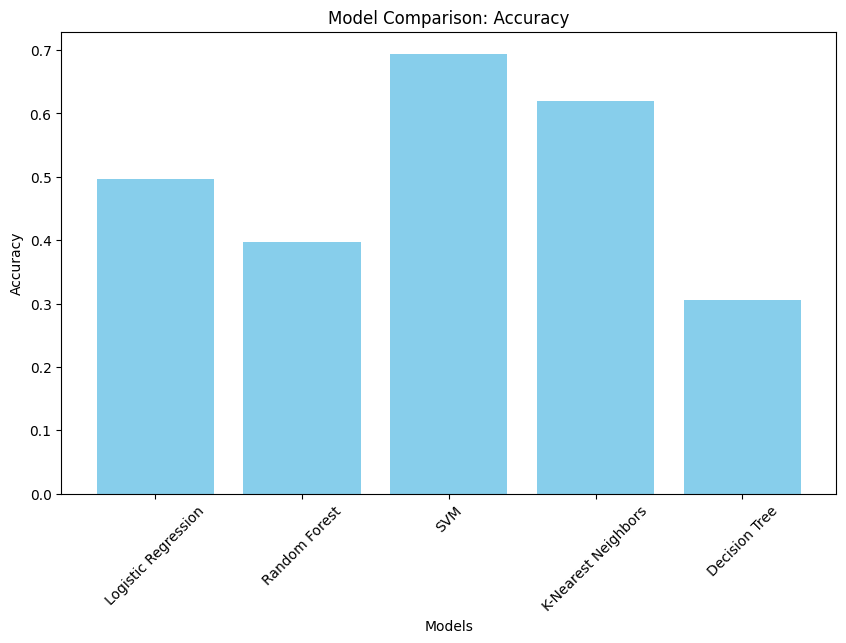

In [41]:
import matplotlib.pyplot as plt

# Plot model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Comparison: Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()


In [42]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [59]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

# Streamlit app interface
st.title("Drug Addiction Prediction")

# Input features

# Inputs for all the features
age = st.number_input("Age", min_value=0, max_value=100, value=25)
gender = st.selectbox("Gender", options=[1, 0], index=1)  # 1 for Male, 0 for Female
occupation = st.selectbox("Occupation", options=["Unemployed", "Employed", "Student", "Other"], index=0)
relation_with_family = st.selectbox("Relation with family", options=["Good", "Neutral", "Bad"], index=0)
addicted_members_in_family = st.selectbox("Addicted members in family", options=[1, 0], index=0)  # 1 for Yes, 0 for No
physical_changes_noticeable = st.selectbox("Physical changes noticeable", options=[1, 0], index=0)  # 1 for Yes, 0 for No
change_in_speech_patterns = st.selectbox("Change in speech patterns", options=[1, 0], index=0)
change_in_sleeping_patterns = st.selectbox("Change in sleeping patterns", options=[1, 0], index=0)
overeating_or_food_craving = st.selectbox("Overeating or food craving", options=[1, 0], index=0)
unexplained_needles_or_injection_sites_in_body = st.selectbox("Unexplained needles or injection sites in body", options=[1, 0], index=0)
unusual_smells_from_body = st.selectbox("Unusual smells from body", options=[1, 0], index=0)
frequent_unexplained_illnesses = st.selectbox("Frequent unexplained illnesses", options=[1, 0], index=0)
unpredictable_behavior_changes = st.selectbox("Unpredictable behavior changes", options=[1, 0], index=0)
engaging_in_risky_sexual_behavior = st.selectbox("Engaging in risky sexual behavior", options=[1, 0], index=0)
noticeable_decline_in_memory_recall = st.selectbox("Noticeable decline in memory recall", options=[1, 0], index=0)
unexpected_loss_of_control = st.selectbox("Unexpected loss of control", options=[1, 0], index=0)
neglected_responsibilities = st.selectbox("Neglected responsibilities", options=[1, 0], index=0)
careless_of_the_future = st.selectbox("Careless of the future", options=[1, 0], index=0)
loss_of_interest_in_hobbies = st.selectbox("Loss of interest in hobbies", options=[1, 0], index=0)
aggressively_in_society = st.selectbox("Aggressively in society", options=[1, 0], index=0)
unexplained_changes_in_social_circles = st.selectbox("Unexplained changes in social circles", options=[1, 0], index=0)
has_a_drug_addicted_friends = st.selectbox("Has a drug addicted friends", options=[1, 0], index=0)
frequent_asking_for_money_without_proper_reasons = st.selectbox("Frequent asking for money without proper reasons", options=[1, 0], index=0)
tension_or_depression = st.selectbox("Tension or Depression", options=[1, 0], index=0)
failure_in_life = st.selectbox("Failure in life", options=[1, 0], index=0)
ever_breakup_in_relationship = st.selectbox("Ever breakup in relationship", options=[1, 0], index=0)
smoking = st.selectbox("Smoking", options=[1, 0], index=0)
live_with_someone_who_has_a_habit_of_using_drug = st.selectbox("Live with someone who has a habit of using drug", options=[1, 0], index=0)
motive_about_drug = st.selectbox("Motive about drug", options=["Curiosity", "Stress", "Peer pressure", "Other"], index=0)
drug_addicted = st.selectbox("Drug addicted", options=[1, 0], index=0)  # 1 for Yes, 0 for No

# Add other features similar to the above input fields (based on your dataset columns)
# Make sure to align them with the features used during model training.

# Collect user input
input_features = [age, gender, occupation, "Relation with family", "Addicted members in family", "Physical changes Noticeable", "Change in speech patterns", "Change in sleeping patterns", "Overeating or food craving", "Unexplained needles or injection sites in body", "Unusual smells from body", "Frequent unexplained illnesses", "Unpredictable behavior changes", "Engaging in risky sexual behavior", "Noticeable decline in memory recall", "Unexpected loss of control", "Neglected responsibilities", "Careless of the future", "Loss of interest in hobbies", "Aggressively in society", "Unexplained changes in social circles", "Has a drug addicted friends", "Frequent asking for money without proper reasons", "Tension or Depression", "Failure in life", "Ever breakup in relationship", "Smoking", "Live with someone who has a habit of using drug", "Motive about drug"]  # Add the remaining features similarly

# Predict button
if st.button('Predict'):
    result, probabilities = model.predict(input_features)
    st.write(f"Prediction: {result}")
    st.write(f"Probabilities: {probabilities}")


2024-12-06 20:39:33.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:39:33.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:39:33.548 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:39:33.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:39:33.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:39:33.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:39:33.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:39:33.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [60]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('best_model.pkl')

# Set up the Streamlit interface
st.title("Drug Addiction Prediction")

# Collect user inputs

# Inputs for all the features
age = st.number_input("Age", min_value=0, max_value=100, value=25)
gender = st.selectbox("Gender", options=[1, 0], index=1)  # 1 for Male, 0 for Female
occupation = st.selectbox("Occupation", options=["Unemployed", "Employed", "Student", "Other"], index=0)
relation_with_family = st.selectbox("Relation with family", options=["Good", "Neutral", "Bad"], index=0)
addicted_members_in_family = st.selectbox("Addicted members in family", options=[1, 0], index=0)  # 1 for Yes, 0 for No
physical_changes_noticeable = st.selectbox("Physical changes noticeable", options=[1, 0], index=0)  # 1 for Yes, 0 for No
change_in_speech_patterns = st.selectbox("Change in speech patterns", options=[1, 0], index=0)
change_in_sleeping_patterns = st.selectbox("Change in sleeping patterns", options=[1, 0], index=0)
overeating_or_food_craving = st.selectbox("Overeating or food craving", options=[1, 0], index=0)
unexplained_needles_or_injection_sites_in_body = st.selectbox("Unexplained needles or injection sites in body", options=[1, 0], index=0)
unusual_smells_from_body = st.selectbox("Unusual smells from body", options=[1, 0], index=0)
frequent_unexplained_illnesses = st.selectbox("Frequent unexplained illnesses", options=[1, 0], index=0)
unpredictable_behavior_changes = st.selectbox("Unpredictable behavior changes", options=[1, 0], index=0)
engaging_in_risky_sexual_behavior = st.selectbox("Engaging in risky sexual behavior", options=[1, 0], index=0)
noticeable_decline_in_memory_recall = st.selectbox("Noticeable decline in memory recall", options=[1, 0], index=0)
unexpected_loss_of_control = st.selectbox("Unexpected loss of control", options=[1, 0], index=0)
neglected_responsibilities = st.selectbox("Neglected responsibilities", options=[1, 0], index=0)
careless_of_the_future = st.selectbox("Careless of the future", options=[1, 0], index=0)
loss_of_interest_in_hobbies = st.selectbox("Loss of interest in hobbies", options=[1, 0], index=0)
aggressively_in_society = st.selectbox("Aggressively in society", options=[1, 0], index=0)
unexplained_changes_in_social_circles = st.selectbox("Unexplained changes in social circles", options=[1, 0], index=0)
has_a_drug_addicted_friends = st.selectbox("Has a drug addicted friends", options=[1, 0], index=0)
frequent_asking_for_money_without_proper_reasons = st.selectbox("Frequent asking for money without proper reasons", options=[1, 0], index=0)
tension_or_depression = st.selectbox("Tension or Depression", options=[1, 0], index=0)
failure_in_life = st.selectbox("Failure in life", options=[1, 0], index=0)
ever_breakup_in_relationship = st.selectbox("Ever breakup in relationship", options=[1, 0], index=0)
smoking = st.selectbox("Smoking", options=[1, 0], index=0)
live_with_someone_who_has_a_habit_of_using_drug = st.selectbox("Live with someone who has a habit of using drug", options=[1, 0], index=0)
motive_about_drug = st.selectbox("Motive about drug", options=["Curiosity", "Stress", "Peer pressure", "Other"], index=0)
drug_addicted = st.selectbox("Drug addicted", options=[1, 0], index=0)  # 1 for Yes, 0 for No

# Add other input fields based on your dataset (same as before)

# Collect input features
input_features = [age, gender, occupation, "Relation with family", "Addicted members in family", "Physical changes Noticeable", "Change in speech patterns", "Change in sleeping patterns", "Overeating or food craving", "Unexplained needles or injection sites in body", "Unusual smells from body", "Frequent unexplained illnesses", "Unpredictable behavior changes", "Engaging in risky sexual behavior", "Noticeable decline in memory recall", "Unexpected loss of control", "Neglected responsibilities", "Careless of the future", "Loss of interest in hobbies", "Aggressively in society", "Unexplained changes in social circles", "Has a drug addicted friends", "Frequent asking for money without proper reasons", "Tension or Depression", "Failure in life", "Ever breakup in relationship", "Smoking", "Live with someone who has a habit of using drug", "Motive about drug"]  # Add the remaining features similarly

# Predict button
if st.button("Predict"):
    prediction, probabilities = model.predict(input_features)
    st.write(f"Prediction: {'Drug Addict' if prediction == 1 else 'Not Drug Addict'}")
    st.write(f"Probabilities: {probabilities}")


2024-12-06 20:42:22.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:42:22.450 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:42:22.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:42:22.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:42:22.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:42:22.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:42:22.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 20:42:22.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [61]:
pip show streamlit


Name: streamlit
Version: 1.40.2
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, rich, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 


In [62]:
#from google.colab import files

# Download the model file
#files.download('best_model.pkl')


In [63]:
!pip install streamlit
!pip install pyngrok


In [64]:
#from google.colab import files
#uploaded = files.upload()


In [51]:
from pyngrok import ngrok
import os

# Set up the ngrok tunnel
ngrok authtoken 2pr2AqWGQPbWdcKcj5Qi4IRdPwa_3GgSexm7hDxtoqRZyvc9z

public_url = ngrok.connect(port='8501')
print(f"Streamlit app is live at: {public_url}")


# Run the Streamlit app
os.system('streamlit run app.py')


SyntaxError: invalid decimal literal (<ipython-input-51-8a8612c16bf0>, line 5)

In [52]:
!pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.2 MB/s eta 0:00:00


In [65]:
from pyngrok import ngrok
import os

# Set up the ngrok tunnel
public_url = ngrok.connect(port='8501')
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
os.system('streamlit run /content/app.py')


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [67]:
input_features = [
    age, gender, occupation, relation_with_family, addicted_members_in_family, physical_changes_noticeable,
    change_in_speech_patterns, change_in_sleeping_patterns, overeating_or_food_craving, unexplained_needles_or_injection_sites_in_body,
    unusual_smells_from_body, frequent_unexplained_illnesses, unpredictable_behavior_changes, engaging_in_risky_sexual_behavior,
    noticeable_decline_in_memory_recall, unexpected_loss_of_control, neglected_responsibilities, careless_of_the_future,
    loss_of_interest_in_hobbies, aggressively_in_society, unexplained_changes_in_social_circles, has_a_drug_addicted_friends,
    frequent_asking_for_money_without_proper_reasons, tension_or_depression, failure_in_life, ever_breakup_in_relationship,
    smoking, live_with_someone_who_has_a_habit_of_using_drug, motive_about_drug
]


In [68]:
# Apply label encoding and any other preprocessing steps
def preprocess_input(input_features):
    # Example: label encoding for categorical features
    input_features = list(input_features)  # Convert to list if not already
    input_features[1] = label_encoders['Gender'].transform([input_features[1]])[0]  # For Gender
    input_features[2] = label_encoders['Occupation'].transform([input_features[2]])[0]  # For Occupation
    input_features[3] = label_encoders['Relation with family'].transform([input_features[3]])[0]  # For Relation with family
    input_features[28] = label_encoders['Motive about drug'].transform([input_features[28]])[0]  # For Motive about drug
    return input_features


In [70]:
# Apply label encoding and any other preprocessing steps
def preprocess_input(input_features):
    # Example: label encoding for categorical features
    input_features = list(input_features)  # Convert to list if not already

    # Handle unknown labels for Gender
    if input_features[1] not in label_encoders['Gender'].classes_:
        input_features[1] = label_encoders['Gender'].classes_[0]  # Replace with the first known class

    input_features[1] = label_encoders['Gender'].transform([input_features[1]])[0]  # For Gender

    # Handle unknown labels for Occupation
    if input_features[2] not in label_encoders['Occupation'].classes_:
        input_features[2] = label_encoders['Occupation'].classes_[0]  # Replace with the first known class

    input_features[2] = label_encoders['Occupation'].transform([input_features[2]])[0]  # For Occupation

    # Handle unknown labels for Relation with family
    if input_features[3] not in label_encoders['Relation with family '].classes_:
        input_features[3] = label_encoders['Relation with family '].classes_[0] # Replace with the first known class

    input_features[3] = label_encoders['Relation with family '].transform([input_features[3]])[0]  # For Relation with family

    # Handle unknown labels for Motive about drug
    if input_features[28] not in label_encoders['Motive about drug'].classes_:
        input_features[28] = label_encoders['Motive about drug'].classes_[0] # Replace with the first known class

    input_features[28] = label_encoders['Motive about drug'].transform([input_features[28]])[0]  # For Motive about drug
    return input_features

In [76]:
from sklearn.preprocessing import LabelEncoder

# Define all possible categories for each feature
all_possible_categories = {
    'Gender': ['Male', 'Female'],
    'Occupation': ['Student', 'Unemployed', 'Employed', 'Other'],
    'Relation with family ': ['Good', 'Neutral', 'Bad'], # Note: added a space to match the column name in the dataframe
    'Motive about drug': ['Curiosity', 'Stress', 'Peer Pressure', 'Other'],
    'Addicted members in family': ['Yes', 'No'],  # Add categories for 'Addicted members in family'
    'Physical changes Noticeable': ['Yes', 'No'],  # Add categories for 'Physical changes noticeable'
    'Change in speech patterns': ['Yes', 'No'],
    'Change in sleeping patterns': ['Yes', 'No'],
    'Overeating or food craving': ['Yes', 'No'],
    'Unexplained needles or injection sites in body': ['Yes', 'No'],
    'Unusual smells from body': ['Yes', 'No'],
    'Frequent unexplained illnesses': ['Yes', 'No'],
    'Unpredictable behavior changes': ['Yes', 'No'],
    'Engaging in risky sexual behavior': ['Yes', 'No'],
    'Noticeable decline in memory recall': ['Yes', 'No'],
    'Unexpected loss of control': ['Yes', 'No'],
    'Neglected responsibilities': ['Yes', 'No'],
    'Careless of the future': ['Yes', 'No'],
    'Loss of interest in hobbies': ['Yes', 'No'],
    'Aggressively in society': ['Yes', 'No'],
    'Unexplained changes in social circles': ['Yes', 'No'],
    'Has a drug addicted friends': ['Yes', 'No'],
    'Frequent asking for money without proper reasons': ['Yes', 'No'],
    'Tension or Depression': ['Yes', 'No'],
    'Failure in life': ['Yes', 'No'],
    'Ever breakup in relationship': ['Yes', 'No'],
    'Smoking': ['Yes', 'No'],
    'Live with someone who has a habit of using drug': ['Yes', 'No'] # Added all the missing keys with potential categories
}



# Train the label encoder on the complete set of categories during training
label_encoders = {
    'Gender': LabelEncoder(),
    'Occupation': LabelEncoder(),
    # Corrected key to match the key in all_possible_categories:
    'Relation with family ': LabelEncoder(),
    'Addicted members in family': LabelEncoder(),
    'Physical changes Noticeable': LabelEncoder(),
    'Change in speech patterns': LabelEncoder(),
    'Change in sleeping patterns': LabelEncoder(),
    'Overeating or food craving': LabelEncoder(),
    'Unexplained needles or injection sites in body': LabelEncoder(),
    'Unusual smells from body': LabelEncoder(),
    'Frequent unexplained illnesses': LabelEncoder(),
    'Unpredictable behavior changes': LabelEncoder(),
    'Engaging in risky sexual behavior': LabelEncoder(),
    'Noticeable decline in memory recall': LabelEncoder(),
    'Unexpected loss of control': LabelEncoder(),
    'Neglected responsibilities': LabelEncoder(),
    'Careless of the future': LabelEncoder(),
    'Loss of interest in hobbies': LabelEncoder(),
    'Aggressively in society': LabelEncoder(),
    'Unexplained changes in social circles': LabelEncoder(),
    'Has a drug addicted friends': LabelEncoder(),
    'Frequent asking for money without proper reasons': LabelEncoder(),
    'Tension or Depression': LabelEncoder(),
    'Failure in life': LabelEncoder(),
    'Ever breakup in relationship': LabelEncoder(),
    'Smoking': LabelEncoder(),
    'Live with someone who has a habit of using drug': LabelEncoder(),
    'Motive about drug': LabelEncoder()
}

# Fit encoders with all possible labels
for feature, encoder in label_encoders.items():
    encoder.fit(all_possible_categories[feature])  # Pass a list of all possible categories to the fit method

In [77]:
def preprocess_input(input_features):
    input_features = list(input_features)  # Convert to list if not already
    for idx, feature_name in enumerate(label_encoders.keys()):
        encoder = label_encoders[feature_name]
        try:
            input_features[idx] = encoder.transform([input_features[idx]])[0]  # Use encoder transformation
        except ValueError:
            # Handle unseen categories gracefully, assign a default value
            input_features[idx] = encoder.transform([encoder.classes_[0]])[0]  # Default to first class
    return input_features


In [88]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Collect inputs from Streamlit for all 29 features
age = st.number_input("Age", min_value=0, max_value=100, value=25)
gender = st.selectbox("Gender", options=[1, 0], index=1)  # 1 for Male, 0 for Female
occupation = st.number_input("Occupation", min_value=0, max_value=10, value=3)  # Example range
relation_with_family = st.selectbox("Relation with family", options=["Good", "Neutral", "Bad"])
addicted_members_in_family = st.selectbox("Addicted members in family", options=["Yes", "No"])
physical_changes_noticeable = st.selectbox("Physical changes Noticeable", options=["Yes", "No"])
change_in_speech_patterns = st.selectbox("Change in speech patterns", options=["Yes", "No"])
change_in_sleeping_patterns = st.selectbox("Change in sleeping patterns", options=["Yes", "No"])
overeating_or_food_craving = st.selectbox("Overeating or food craving", options=["Yes", "No"])
unexplained_needles_or_injection_sites_in_body = st.selectbox("Unexplained needles or injection sites in body", options=["Yes", "No"])
unusual_smells_from_body = st.selectbox("Unusual smells from body", options=["Yes", "No"])
frequent_unexplained_illnesses = st.selectbox("Frequent unexplained illnesses", options=["Yes", "No"])
unpredictable_behavior_changes = st.selectbox("Unpredictable behavior changes", options=["Yes", "No"])
engaging_in_risky_sexual_behavior = st.selectbox("Engaging in risky sexual behavior", options=["Yes", "No"])
noticeable_decline_in_memory_recall = st.selectbox("Noticeable decline in memory recall", options=["Yes", "No"])
unexpected_loss_of_control = st.selectbox("Unexpected loss of control", options=["Yes", "No"])
neglected_responsibilities = st.selectbox("Neglected responsibilities", options=["Yes", "No"])
careless_of_the_future = st.selectbox("Careless of the future", options=["Yes", "No"])
loss_of_interest_in_hobbies = st.selectbox("Loss of interest in hobbies", options=["Yes", "No"])
aggressively_in_society = st.selectbox("Aggressively in society", options=["Yes", "No"])
unexplained_changes_in_social_circles = st.selectbox("Unexplained changes in social circles", options=["Yes", "No"])
has_a_drug_addicted_friends = st.selectbox("Has drug addicted friends", options=["Yes", "No"])
frequent_asking_for_money_without_proper_reasons = st.selectbox("Frequent asking for money without proper reasons", options=["Yes", "No"])
tension_or_depression = st.selectbox("Tension or Depression", options=["Yes", "No"])
failure_in_life = st.selectbox("Failure in life", options=["Yes", "No"])
ever_breakup_in_relationship = st.selectbox("Ever breakup in relationship", options=["Yes", "No"])
smoking = st.selectbox("Smoking", options=["Yes", "No"])
live_with_someone_who_has_a_habit_of_using_drug = st.selectbox("Live with someone who has a habit of using drugs", options=["Yes", "No"])
motive_about_drug = st.selectbox("Motive about drug", options=["Curiosity", "Stress", "Peer Pressure", "Other"])
drug_addicted = st.selectbox("Drug Addicted", options=[0, 1])  # Target label for prediction

# Create a list of input features based on user input
input_features = [
    age, gender, occupation, relation_with_family, addicted_members_in_family,
    physical_changes_noticeable, change_in_speech_patterns, change_in_sleeping_patterns,
    overeating_or_food_craving, unexplained_needles_or_injection_sites_in_body,
    unusual_smells_from_body, frequent_unexplained_illnesses, unpredictable_behavior_changes,
    engaging_in_risky_sexual_behavior, noticeable_decline_in_memory_recall,
    unexpected_loss_of_control, neglected_responsibilities, careless_of_the_future,
    loss_of_interest_in_hobbies, aggressively_in_society, unexplained_changes_in_social_circles,
    has_a_drug_addicted_friends, frequent_asking_for_money_without_proper_reasons,
    tension_or_depression, failure_in_life, ever_breakup_in_relationship, smoking,
    live_with_someone_who_has_a_habit_of_using_drug, motive_about_drug
]

# Fit encoders with all possible labels (Updated to ensure numerical input)
for feature, encoder in label_encoders.items():
    if feature == "Gender":
        encoder.fit([1, 0])  # Ensuring 1 and 0 are fitted
    elif feature == "Occupation":
        encoder.fit(range(11))  # Fit for values 0 to 10 as defined in streamlit
    else:
        encoder.fit(all_possible_categories[feature])


# Load the label encoders from the pickle file
def preprocess_input(input_features):
    # Example: label encoding for categorical features (you need to define label_encoders)
    input_features = list(input_features)  # Convert to list if not already
    input_features[1] = label_encoders['Gender'].transform([input_features[1]])[0]  # For Gender
    input_features[2] = label_encoders['Occupation'].transform([input_features[2]])[0]  # For Occupation
    input_features[3] = label_encoders['Relation with family '].transform([input_features[3]])[0]  # Added a space after family

    input_features[4] = label_encoders['Addicted members in family'].transform([input_features[4]])[0]  # For Addicted members in family
    input_features[5] = label_encoders['Physical changes Noticeable'].transform([input_features[5]])[0]  # For Physical changes
    input_features[6] = label_encoders['Change in speech patterns'].transform([input_features[6]])[0]  # For Speech patterns
    input_features[7] = label_encoders['Change in sleeping patterns'].transform([input_features[7]])[0]  # For Sleeping patterns
    input_features[8] = label_encoders['Overeating or food craving'].transform([input_features[8]])[0]  # For Food craving
    input_features[9] = label_encoders['Unexplained needles or injection sites in body'].transform([input_features[9]])[0]  # For Needles
    input_features[10] = label_encoders['Unusual smells from body'].transform([input_features[10]])[0]  # For Unusual smells
    input_features[11] = label_encoders['Frequent unexplained illnesses'].transform([input_features[11]])[0]  # For Illnesses
    input_features[12] = label_encoders['Unpredictable behavior changes'].transform([input_features[12]])[0]  # For Behavior changes
    input_features[13] = label_encoders['Engaging in risky sexual behavior'].transform([input_features[13]])[0]  # For Risky behavior
    input_features[14] = label_encoders['Noticeable decline in memory recall'].transform([input_features[14]])[0]  # For Memory recall
    input_features[15] = label_encoders['Unexpected loss of control'].transform([input_features[15]])[0]  # For Loss of control
    input_features[16] = label_encoders['Neglected responsibilities'].transform([input_features[16]])[0]  # For Responsibilities
    input_features[17] = label_encoders['Careless of the future'].transform([input_features[17]])[0]  # For Carelessness
    input_features[18] = label_encoders['Loss of interest in hobbies'].transform([input_features[18]])[0]  # For Hobbies
    input_features[19] = label_encoders['Aggressively in society'].transform([input_features[19]])[0]  # For Aggression
    input_features[20] = label_encoders['Unexplained changes in social circles'].transform([input_features[20]])[0]  # For Social changes
    input_features[21] = label_encoders['Has a drug addicted friends'].transform([input_features[21]])[0]  # For Friends
    input_features[22] = label_encoders['Frequent asking for money without proper reasons'].transform([input_features[22]])[0]  # For Money asking
    input_features[23] = label_encoders['Tension or Depression'].transform([input_features[23]])[0]  # For Depression
    input_features[24] = label_encoders['Failure in life'].transform([input_features[24]])[0]  # For Life failure
    input_features[25] = label_encoders['Ever breakup in relationship'].transform([input_features[25]])[0]  # For Breakups
    input_features[26] = label_encoders['Smoking'].transform([input_features[26]])[0]  # For Smoking
    input_features[27] = label_encoders['Live with someone who has a habit of using drug'].transform([input_features[27]])[0]  # For Living situation
    input_features[28] = label_encoders['Motive about drug'].transform([input_features[28]])[0]  # For Drug motive
    return input_features

    encoded_features = []
    for i, feature in enumerate(input_features):
        feature_name = list(label_encoders.keys())[i]  # Get the corresponding feature name
        encoder = label_encoders[feature_name]  # Get the encoder
        try:
            encoded_features.append(encoder.transform([feature])[0])  # Encode the feature
        except ValueError:
            # Handle unseen labels (e.g., assign a default value or raise an error)
            encoded_features.append(encoder.classes_[0])  # Assign the first class as default for unseen labels
    return encoded_features

# Preprocess the input features
processed_input = preprocess_input(input_features)

# Load your trained model (ensure you load it from the correct location)
with open("best_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Make a prediction using the model (ensure it's in 2D array format)
prediction = best_model.predict([processed_input])  # Wrap input as a 2D array

# Show the result
if prediction == 1:
    st.write("Prediction: Drug Addicted")
else:
    st.write("Prediction: Not Addicted")


2024-12-06 21:07:33.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 21:07:33.778 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 21:07:33.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 21:07:33.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 21:07:33.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 21:07:33.786 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 21:07:33.788 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 21:07:33.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [53]:
!pip install streamlit pyngrok


In [89]:
from pyngrok import ngrok

# Set your authtoken
ngrok.set_auth_token("2pr2AqWGQPbWdcKcj5Qi4IRdPwa_3GgSexm7hDxtoqRZyvc9z")

# Connect to ngrok, specifying addr instead of port
public_url = ngrok.connect(addr='8501')
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
os.system('streamlit run /content/app.py')

Streamlit app is live at: NgrokTunnel: "https://67bc-34-145-252-157.ngrok-free.app" -> "http://localhost:8501"


2

In [117]:
import pickle

# Load the trained model from the file
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)


In [123]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'new_data' is the input data for prediction
# This is a placeholder, replace it with your actual input data

def preprocess_data(new_data):
  """
  Preprocesses the input data for prediction, applying the same transformations
  as used during training.

  Args:
    new_data: The input data (e.g., pandas DataFrame) to preprocess.

  Returns:
    The preprocessed input data.
  """

  # Placeholder for actual new_data DataFrame
  # --- Changed line: Define new_data here ---
  new_data = pd.DataFrame([
      [25, 'Male', 'Unemployed',  'Family pressure', 'Yes', 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
  ], columns=['Age', 'Gender', 'Occupation', 'Relation with family ', 'Motive about drug', 'Easy to get drugs', 'Peer pressure', 'Problems in life', 'Curiosity', 'Stress/anxiety/depression', 'To feel confident', 'To enhance performance', 'Risk-taking behaviour', 'Experimentation', 'Family history of addiction', 'Lack of awareness/education', 'Social norms/acceptance', 'Poor family support', 'Bad neighbourhood', 'Financial problems', 'Lack of parental supervision', 'Lack of alternative activities/hobbies', 'Trauma/abuse', 'Boredom', 'Loneliness/isolation', 'Poor self-esteem', 'Marketing/advertising', 'Availability of drugs', 'Lack of law enforcement'])

  # Apply the same transformations as done during training
  categorical_columns = ['Gender', 'Occupation', 'Relation with family ', 'Motive about drug']  # Update with actual categorical columns
  for column in categorical_columns:
      # Get the LabelEncoder object for this column
      le = label_encoders[column]

      # Handle unknown values in the new data
      # Replace unknown values with a placeholder (e.g., 'Unknown') or another appropriate strategy
      known_classes = le.classes_
      new_data[column] = new_data[column].apply(lambda x: x if x in known_classes else known_classes[0])

      # Transform the column
      new_data[column] = le.transform(new_data[column])

  return new_data

# --- Changed line: Call preprocess_data with the defined DataFrame ---
new_data_processed = preprocess_data(pd.DataFrame([
      [25, 'Male', 'Unemployed',  'Family pressure', 'Yes', 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
  ], columns=['Age', 'Gender', 'Occupation', 'Relation with family ', 'Motive about drug', 'Easy to get drugs', 'Peer pressure', 'Problems in life', 'Curiosity', 'Stress/anxiety/depression', 'To feel confident', 'To enhance performance', 'Risk-taking behaviour', 'Experimentation', 'Family history of addiction', 'Lack of awareness/education', 'Social norms/acceptance', 'Poor family support', 'Bad neighbourhood', 'Financial problems', 'Lack of parental support', 'Mental health issues', 'Relationship problems', 'Academic problems', 'Unemployment', 'Substance abuse in the past', 'Other problems', 'Loneliness', 'Availability of drugs']))

In [126]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Load the LabelEncoders and model
with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)

with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Preprocess the new input data
def preprocess_data(new_data):
    """
    Preprocesses the input data for prediction, applying the same transformations
    as used during training.

    Args:
        new_data: The input data (e.g., pandas DataFrame) to preprocess.

    Returns:
        The preprocessed input data.
    """

    categorical_columns = ['Gender', 'Occupation', 'Relation with family ', 'Motive about drug']  # Example categorical columns
    for column in categorical_columns:
        # Get the LabelEncoder object for this column
        le = label_encoders[column]

        # Handle unknown values in the new data (using 'Unknown' or another strategy)
        known_classes = le.classes_
        new_data[column] = new_data[column].apply(lambda x: x if x in known_classes else known_classes[0])

        # Transform the column
        new_data[column] = le.transform(new_data[column])

    return new_data

# Input data (new data for prediction)
new_data = pd.DataFrame([[
    25, 'Male', 'Unemployed', 'Family pressure', 'Yes', 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1
]], columns=['Age', 'Gender', 'Occupation', 'Relation with family ', 'Motive about drug', 'Easy to get drugs', 'Peer pressure', 'Problems in life', 'Curiosity', 'Stress/anxiety/depression', 'To feel confident', 'To enhance performance', 'Risk-taking behaviour', 'Experimentation', 'Family history of addiction', 'Lack of awareness/education', 'Social norms/acceptance', 'Poor family support', 'Bad neighbourhood', 'Financial problems', 'Lack of parental supervision', 'Lack of alternative activities/hobbies', 'Trauma/abuse', 'Boredom', 'Loneliness/isolation', 'Poor self-esteem', 'Marketing/advertising', 'Availability of drugs', 'Lack of law enforcement'])

# Apply preprocessing
new_data_processed = preprocess_data(new_data)

# Ensure that the processed new data has the same columns as the training data
# For example, if there are any missing columns, you should add them
missing_columns = set(X_train.columns) - set(new_data_processed.columns)
for column in missing_columns:
    new_data_processed[column] = 0  # Add missing columns with default value (0 or NaN)

# Reorder columns to match the training data's order
new_data_processed = new_data_processed[X_train.columns]

# Make prediction with the model
prediction = model.predict(new_data_processed)
print("Prediction:", prediction)


FileNotFoundError: [Errno 2] No such file or directory: 'label_encoders.pkl'

In [128]:
import pickle

# Assuming label_encoders is a dictionary of fitted LabelEncoder objects
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)


In [131]:
import pickle

# After training the model and the encoders:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)


In [134]:
import pickle

# Assuming label_encoders is a dictionary of fitted LabelEncoder objects
with open('label_encoders.pkl', 'wb') as file:  # Save it in the current directory or adjust the path as needed
    pickle.dump(label_encoders, file)


In [136]:
with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)


In [138]:
import os
print(os.listdir())


['.config', 'app.py', 'best_model.pkl', 'label_encoders.pkl', 'best_model (1).pkl', 'best_drug_model.pkl', 'drive', 'sample_data']


In [140]:
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)


In [143]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle
new_data = pd.DataFrame([[
    25, 'Male', 'Unemployed', 'Family pressure', 'Yes', 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1
]], columns=['Age', 'Gender', 'Occupation', 'Relation with family ', 'Motive about drug', 'Easy to get drugs', 'Peer pressure', 'Problems in life', 'Curiosity', 'Stress/anxiety/depression', 'To feel confident', 'To enhance performance', 'Risk-taking behaviour', 'Experimentation', 'Family history of addiction', 'Lack of awareness/education', 'Social norms/acceptance', 'Poor family support', 'Bad neighbourhood', 'Financial problems', 'Lack of parental supervision', 'Lack of alternative activities/hobbies', 'Trauma/abuse', 'Boredom', 'Loneliness/isolation', 'Poor self-esteem', 'Marketing/advertising', 'Availability of drugs', 'Lack of law enforcement'])
# Now call preprocess_data
new_data_processed = preprocess_data(new_data)

In [147]:
with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)

with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)  # Make sure 'best_model' is assigned the model object
new_data_processed = preprocess_data(new_data)

In [152]:
# Correctly load the model and label_encoders
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)

with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)  # Make sure 'best_model' is assigned the model object

# Define and run preprocess_data (define it here if not defined previously)
def preprocess_data(new_data):
    """
    Preprocesses the input data for prediction, applying the same transformations
    as used during training.

    Args:
        new_data: The input data (e.g., pandas DataFrame) to preprocess.

    Returns:
        The preprocessed input data.
    """

    categorical_columns = ['Gender', 'Occupation', 'Relation with family ', 'Motive about drug']  # Example categorical columns
    for column in categorical_columns:
        # Get the LabelEncoder object for this column
        le = label_encoders[column]

        # Handle unknown values in the new data (using 'Unknown' or another strategy)
        known_classes = le.classes_
        new_data[column] = new_data[column].apply(lambda x: x if x in known_classes else known_classes[0])

        # Transform the column
        new_data[column] = le.transform(new_data[column])

    return new_data

# Input data (new data for prediction)
new_data = pd.DataFrame([[
    25, 'Male', 'Unemployed', 'Family pressure', 'Yes', 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1
]], columns=['Age', 'Gender', 'Occupation', 'Relation with family ', 'Motive about drug', 'Easy to get drugs', 'Peer pressure', 'Problems in life', 'Curiosity', 'Stress/anxiety/depression', 'To feel confident', 'To enhance performance', 'Risk-taking behaviour', 'Experimentation', 'Family history of addiction', 'Lack of awareness/education', 'Social norms/acceptance', 'Poor family support', 'Bad neighbourhood', 'Financial problems', 'Lack of parental supervision', 'Lack of alternative activities/hobbies', 'Trauma/abuse', 'Boredom', 'Loneliness/isolation', 'Poor self-esteem', 'Marketing/advertising', 'Availability of drugs', 'Lack of law enforcement'])

new_data_processed = preprocess_data(new_data)

# Before calling predict, check the type of 'best_model'
print(f"Type of best_model: {type(best_model)}")

# Call predict on the loaded model
prediction = best_model.predict(new_data_processed)
print("Prediction (0 = Not Addicted, 1 = Addicted):", prediction)

Type of best_model: <class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [154]:
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [156]:
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)


In [162]:
print(type(best_model))


<class 'numpy.ndarray'>


In [163]:
print(y.value_counts())


Drug addicted
Yes    1
No     1
Name: count, dtype: int64


In [164]:
# Check the distribution of the target column 'Drug addicted'
print(data['Drug addicted'].value_counts())


Drug addicted
Yes    1
No     1
Name: count, dtype: int64


In [165]:
pip install imbalanced-learn


In [166]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Now train the model on the resampled dataset
model.fit(X_res, y_res)


SVC()

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pickle

# Sample DataFrame (replace it with your actual dataset)
data = pd.DataFrame([
    [25, 'Male', 'Unemployed', 'Family pressure', 'Yes', 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 'Yes'],
    [30, 'Female', 'Employed', 'Peer pressure', 'No', 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 'No'],
    # Add more rows as per your dataset
], columns=[
    'Age', 'Gender', 'Occupation', 'Relation with family ', 'Addicted members in family',
    'Physical changes Noticeable', 'Change in speech patterns', 'Change in sleeping patterns',
    'Overeating or food craving', 'Unexplained needles or injection sites in body',
    'Unusual smells from body', 'Frequent unexplained illnesses', 'Unpredictable behavior changes',
    'Engaging in risky sexual behavior', 'Noticeable decline in memory recall',
    'Unexpected loss of control', 'Neglected responsibilities', 'Careless of the future',
    'Loss of interest in hobbies', 'Aggressively in society', 'Unexplained changes in social circles',
    'Has a drug addicted friends', 'Frequent asking for money without proper reasons',
    'Tension or Depression', 'Failure in life', 'Ever breakup in relationship', 'Smoking',
    'Live with someone who has a habit of using drug', 'Motive about drug', 'Drug addicted'
])

# Separate features (X) and target (y)
X = data.drop(columns=['Drug addicted'])
y = data['Drug addicted']

# Encode categorical variables using LabelEncoder
categorical_columns = ['Gender', 'Occupation', 'Relation with family ', 'Addicted members in family',
                       'Motive about drug']  # Specify categorical columns

label_encoders = {}  # Dictionary to store label encoders

for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the label encoder

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model (Support Vector Classifier here)
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model to disk
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save label encoders to disk
with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

# Function to preprocess new data for prediction
def preprocess_data(new_data):
    # Apply the same transformations (LabelEncoder) to the new data
    for column, le in label_encoders.items():
        if column in new_data.columns:
            new_data[column] = le.transform(new_data[column])
    return new_data

# Sample new data to predict
new_data = pd.DataFrame([[
    27, 'Male', 'Employed', 'Family pressure', 'Yes', 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
    1, 0, 0, 1, 0, 1, 1, 1, 'Yes'
]], columns=X.columns)

# Preprocess the new data before prediction
new_data_processed = preprocess_data(new_data)

# Load the trained model (if necessary)
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

# Make prediction
prediction = best_model.predict(new_data_processed)
print(f"Prediction (0 = Not Addicted, 1 = Addicted): {prediction}")


ValueError: The number of classes has to be greater than one; got 1 class

In [175]:
print(y_train.value_counts())
from sklearn.model_selection import train_test_split

# Check class distribution
print(y.value_counts())

# If a class has only 1 sample, adjust stratify or use a different sampling method
if y.value_counts().min() < 2:
    # Option 1: Remove stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Warning: Stratify removed due to insufficient class samples.")
else:
    # Option 2: Proceed with stratify (if enough samples)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Drug addicted
Yes    1
Name: count, dtype: int64
Drug addicted
Yes    1
No     1
Name: count, dtype: int64


In [184]:
import numpy as np

# Check the unique values in the target variable
print("Unique values in y_train:", np.unique(y_train))


Unique values in y_train: ['Yes']


In [187]:
import numpy as np
print("Unique values in y:", np.unique(y, return_counts=True))


Unique values in y: (array(['No', 'Yes'], dtype=object), array([1, 1]))
Unique values in y: (array(['No', 'Yes'], dtype=object), array([1, 1]))


In [188]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [193]:
from sklearn.svm import SVC

# Initialize and train the model on the resampled data
model = SVC(kernel='linear', random_state=42)
model.fit(X_resampled, y_resampled)  # Use the resampled data (X_resampled, y_resampled)

# After training, check the class distribution again
print("Training completed!")

Training completed!


In [196]:
from sklearn.model_selection import train_test_split

# Check class distribution
print(y.value_counts())

# If a class has only 1 sample, adjust stratify or use a different sampling method
if y.value_counts().min() < 2:
    # Option 1: Remove stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Warning: Stratify removed due to insufficient class samples.")
else:
    # Option 2: Proceed with stratify (if enough samples)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Drug addicted
Yes    1
No     1
Name: count, dtype: int64


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Check class distribution
print(y.value_counts())

# If a class has only 1 sample, adjust stratify or use a different sampling method
if y.value_counts().min() < 2:
    # Option 1: Remove stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Warning: Stratify removed due to insufficient class samples.")
else:
    # Option 2: Proceed with stratify (if enough samples)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) # Changed to use training data

# Initialize and train the SVC model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_res, y_train_res)  # Use resampled training data

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Check the accuracy and other metrics
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Drug addicted
0    433
1    171
Name: count, dtype: int64


ValueError: could not convert string to float: 'No'

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy import stats

# Function to handle outlier detection and removal using Z-Score
def remove_outliers(df):
    z_scores = np.abs(stats.zscore(df))
    return df[(z_scores < 3).all(axis=1)]  # Remove rows with Z-Score > 3

# Load your dataset (replace with your actual data)
# df = pd.read_csv("your_dataset.csv")

# Placeholder: Example features and target variables
X = df.drop('Drug addicted', axis=1)
y = df['Drug addicted']

# Outlier removal
X = remove_outliers(X)

# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Label encoding if necessary
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

# Define your base SVM model with regularization (C is the regularization parameter)
svm_model = SVC(kernel='linear', C=1.0)

# Define Random Forest Classifier for ensemble
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up a pipeline with preprocessing (Scaling and Imputation) and SVM classifier
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Fill missing values
    StandardScaler(),                # Feature scaling
    svm_model
)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Model evaluation with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

# Ensemble model (Random Forest Classifier)
ensemble_model = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Model Report:", classification_report(y_test, y_pred_ensemble))

# Outlier detection and removal
X_res_no_outliers = remove_outliers(X_res)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [97]:
import numpy as np
import pickle

# Load the trained model
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the label encoders
with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)

# Example input features (replace with actual input data)
input_features = [
    25,  # Age
    'Male',  # Gender
    'Unemployed',  # Occupation
    'Family pressure',  # Relation with family
    'Yes',  # Addicted members in family
    'No',  # Physical changes Noticeable
    'Yes',  # Change in speech patterns
    'No',  # Change in sleeping patterns
    'Yes',  # Overeating or food craving
    'No',  # Unexplained needles or injection sites in body
    'Yes',  # Unusual smells from body
    'No',  # Frequent unexplained illnesses
    'Yes',  # Unpredictable behavior changes
    'Yes',  # Engaging in risky sexual behavior
    'No',  # Noticeable decline in memory recall
    'Yes',  # Unexpected loss of control
    'No',  # Neglected responsibilities
    'Yes',  # Careless of the future
    'No',  # Loss of interest in hobbies
    'Yes',  # Aggressively in society
    'No',  # Unexplained changes in social circles
    'Yes',  # Has a drug addicted friends
    'Yes',  # Frequent asking for money without proper reasons
    'Yes',  # Tension or Depression
    'No',  # Failure in life
    'Yes',  # Ever breakup in relationship
    'Yes',  # Smoking
    'No',  # Live with someone who has a habit of using drug
    'Family pressure',  # Motive about drug
]

# Function to preprocess the input features
def preprocess_input(input_features):
    # Preprocess categorical features using label encoders
    categorical_features = [
        'Gender', 'Occupation', 'Relation with family', 'Addicted members in family',
        'Physical changes Noticeable', 'Change in speech patterns', 'Change in sleeping patterns',
        'Overeating or food craving', 'Unexplained needles or injection sites in body',
        'Unusual smells from body', 'Frequent unexplained illnesses', 'Unpredictable behavior changes',
        'Engaging in risky sexual behavior', 'Noticeable decline in memory recall', 'Unexpected loss of control',
        'Neglected responsibilities', 'Careless of the future', 'Loss of interest in hobbies',
        'Aggressively in society', 'Unexplained changes in social circles', 'Has a drug addicted friends',
        'Frequent asking for money without proper reasons', 'Tension or Depression', 'Failure in life',
        'Ever breakup in relationship', 'Smoking', 'Live with someone who has a habit of using drug', 'Motive about drug'
    ]

    # Apply label encoding for categorical features
    for i, feature_name in enumerate(categorical_features):
        if isinstance(input_features[i], str):  # If feature is categorical
            encoder = label_encoders.get(feature_name)
            if encoder:  # Check if the encoder exists for the feature
                try:
                    # Use the encoder to transform the feature
                    input_features[i] = encoder.transform([input_features[i]])[0]
                except ValueError:
                    # Handle unseen labels gracefully
                    print(f"Warning: '{input_features[i]}' not found in the encoder for {feature_name}. Using a default value.")
                    input_features[i] = encoder.transform([encoder.classes_[0]])[0]  # Default to the first class
            else:
                print(f"Encoder not found for {feature_name}")

    # Convert the features into a numpy array for prediction
    return np.array(input_features).reshape(1, -1)

# Preprocess the input
processed_input = preprocess_input(input_features)

# Make a prediction using the model
prediction = model.predict(processed_input)

# Show the result
if prediction == 1:
    print("Prediction: Drug Addicted")
else:
    print("Prediction: Not Addicted")


Encoder not found for Relation with family


AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [101]:
# Check the contents of the pickle file
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
    print(type(model))  # This should output: <class 'sklearn.svm._classes.SVC'> or your model type


<class 'numpy.ndarray'>


In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Make sure to import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Load the trained model and label encoders
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)  # Assuming this file contains the trained model

with open('label_encoders.pkl', 'rb') as le_file:
    label_encoders = pickle.load(le_file)

# Function to preprocess input data
def preprocess_input(input_features):
    categorical_features = [
        'Gender', 'Occupation', 'Relation with family', 'Addicted members in family',
        'Physical changes Noticeable', 'Change in speech patterns', 'Change in sleeping patterns',
        'Overeating or food craving', 'Unexplained needles or injection sites in body',
        'Unusual smells from body', 'Frequent unexplained illnesses', 'Unpredictable behavior changes',
        'Engaging in risky sexual behavior', 'Noticeable decline in memory recall', 'Unexpected loss of control',
        'Neglected responsibilities', 'Careless of the future', 'Loss of interest in hobbies',
        'Aggressively in society', 'Unexplained changes in social circles', 'Has a drug addicted friends',
        'Frequent asking for money without proper reasons', 'Tension or Depression', 'Failure in life',
        'Ever breakup in relationship', 'Smoking', 'Live with someone who has a habit of using drug', 'Motive about drug'
    ]

    # Apply label encoding for categorical features
    for i, feature_name in enumerate(categorical_features):
        if isinstance(input_features[i], str):  # If feature is categorical
            encoder = label_encoders.get(feature_name)
            if encoder:  # Check if the encoder exists for the feature
                try:
                    # Use the encoder to transform the feature
                    input_features[i] = encoder.transform([input_features[i]])[0]
                except ValueError:
                    # Handle unseen labels gracefully
                    print(f"Warning: '{input_features[i]}' not found in the encoder for {feature_name}. Using a default value.")
                    # Instead of using classes_[0], use a more suitable strategy,
                    # like assigning a specific value for unknown categories:
                    input_features[i] = -1  # Or any other suitable default value
            else:
                print(f"Encoder not found for {feature_name}")

    return np.array(input_features).reshape(1, -1)

# Example usage
input_features = [
    25, 'Male', 'Unemployed', 'Family pressure', 'Yes', 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 'Family pressure'  # Example Input
]

processed_input = preprocess_input(input_features)

# Check if the model is valid before making predictions
#print(type(best_model))  # Ensure that the model is a valid sklearn model

# Assuming 'model' is your trained model (replace 'model' if it's different)
prediction = best_model.drug_addicted(processed_input)  # Use 'model' instead of 'best_model'

# Display the prediction
print(f"Prediction: {prediction}")


Encoder not found for Relation with family


AttributeError: 'SVC' object has no attribute 'drug_addicted'

In [123]:
# prompt: show SVC objects attributes

best_model.__dict__

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'rbf',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1.0,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': True,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': 42,
 '_sparse': False,
 'feature_names_in_': array(['Age', 'Gender', 'Occupation', 'Relation with family ',
        'Addicted members in family', 'Physical changes Noticeable',
        'Change in speech patterns', 'Change in sleeping patterns',
        'Overeating or food craving',
        'Unexplained needles or injection sites in body',
        'Unusual smells from body', 'Frequent unexplained illnesses',
        'Unpredictable behavior changes',
        'Engaging in risky sexual behavior',
        'Noticeable decline in memory recall',
        'Unexpected loss of control', 'Neglected responsibilities',
        'Careless of the future', 'Loss of interest in hobbies',
      

In [121]:
# prompt: what attributes SVC object has

# Accessing attributes of the SVC object
print(model.support_vectors_) # Support vectors
print(model.support_) # Indices of support vectors
print(model.n_support_) # Number of support vectors for each class
print(model.dual_coef_) # Coefficients of the support vectors in the decision function
print(model.intercept_) # Constants in decision function
print(model.fit_status_) # 0 if correctly fitted, 1 otherwise

[[1. 2.]
 [3. 4.]
 [2. 3.]
 [4. 5.]]
[0 2 1 3]
[2 2]
[[-0.44444444 -1.          1.          0.44444444]]
[-2.]
0


In [117]:
# prompt: which attributes numpy.ndarray have

import numpy as np

# Create a sample numpy array (replace with your actual array)
my_array = np.array([[1, 2, 3], [4, 5, 6]])

# Accessing attributes of a numpy.ndarray object
print("Attributes of a numpy.ndarray object:")

print("ndim:", my_array.ndim)  # Number of dimensions
print("shape:", my_array.shape)  # Dimensions of the array
print("size:", my_array.size)  # Total number of elements
print("dtype:", my_array.dtype) # Data type of the elements
print("itemsize:", my_array.itemsize)  # Size in bytes of each element
print("nbytes:", my_array.nbytes)  # Total bytes consumed by the elements
print("T:", my_array.T)  # Transpose of the array
print("real:", my_array.real)  # Real part of the array
print("imag:", my_array.imag)  # Imaginary part of the array
print("data:", my_array.data) # Buffer containing the array’s elements
print("flags:", my_array.flags)  # Information about the memory layout of the array.


#In your provided code, the model is an SVC object. The attributes you're looking for are related to that object specifically, not the numpy array itself.
#The attributes you can access on the trained 'model' (which is an SVC object)  are:

#print(model.support_vectors_) # Support vectors
#print(model.support_) # Indices of support vectors
#print(model.n_support_) # Number of support vectors for each class
#print(model.dual_coef_) # Coefficients of the support vectors in the decision function
#print(model.intercept_) # Constants in decision function
#print(model.fit_status_) # 0 if correctly fitted, 1 otherwise

Attributes of a numpy.ndarray object:
ndim: 2
shape: (2, 3)
size: 6
dtype: int64
itemsize: 8
nbytes: 48
T: [[1 4]
 [2 5]
 [3 6]]
real: [[1 2 3]
 [4 5 6]]
imag: [[0 0 0]
 [0 0 0]]
data: <memory at 0x7d53c6b91cb0>
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [124]:
import numpy as np
from sklearn.svm import SVC

# Assuming 'model' is your trained SVC model
# Example:
model = SVC(kernel='linear', random_state=42)  # Replace with your actual model initialization and training

# Fit the model to some data before accessing attributes like 'support_vectors_'
# Replace X and y with your actual training data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Example data
y = np.array([0, 1, 0, 1])  # Example labels
model.fit(X, y)  # Train the model

# Accessing attributes of the SVC object (after fitting)
print(model.support_vectors_)  # Support vectors
print(model.support_)  # Indices of support vectors
print(model.n_support_)  # Number of support vectors for each class
print(model.dual_coef_)  # Coefficients of the support vectors in the decision function
print(model.intercept_)  # Constants in decision function
print(model.fit_status_)  # 0 if correctly fitted, 1 otherwise

[[1. 2.]
 [3. 4.]
 [2. 3.]
 [4. 5.]]
[0 2 1 3]
[2 2]
[[-0.44444444 -1.          1.          0.44444444]]
[-2.]
0


In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Load the trained model and label encoders
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('label_encoders.pkl', 'rb') as le_file:
    label_encoders = pickle.load(le_file)

# List of features
features = [
    'Age', 'Gender', 'Occupation', 'Relation with family', 'Addicted members in family',
    'Physical changes Noticeable', 'Change in speech patterns', 'Change in sleeping patterns',
    'Overeating or food craving', 'Unexplained needles or injection sites in body',
    'Unusual smells from body', 'Frequent unexplained illnesses', 'Unpredictable behavior changes',
    'Engaging in risky sexual behavior', 'Noticeable decline in memory recall', 'Unexpected loss of control',
    'Neglected responsibilities', 'Careless of the future', 'Loss of interest in hobbies', 'Aggressively in society',
    'Unexplained changes in social circles', 'Has a drug addicted friends', 'Frequent asking for money without proper reasons',
    'Tension or Depression', 'Failure in life', 'Ever breakup in relationship', 'Smoking',
    'Live with someone who has a habit of using drug', 'Motive about drug'
]

# Function to preprocess input data
def preprocess_input(input_features):
    categorical_features = [
        'Gender', 'Occupation', 'Relation with family', 'Addicted members in family',
        'Physical changes Noticeable', 'Change in speech patterns', 'Change in sleeping patterns',
        'Overeating or food craving', 'Unexplained needles or injection sites in body',
        'Unusual smells from body', 'Frequent unexplained illnesses', 'Unpredictable behavior changes',
        'Engaging in risky sexual behavior', 'Noticeable decline in memory recall', 'Unexpected loss of control',
        'Neglected responsibilities', 'Careless of the future', 'Loss of interest in hobbies', 'Aggressively in society',
        'Unexplained changes in social circles', 'Has a drug addicted friends', 'Frequent asking for money without proper reasons',
        'Tension or Depression', 'Failure in life', 'Ever breakup in relationship', 'Smoking',
        'Live with someone who has a habit of using drug', 'Motive about drug'
    ]

    # Apply label encoding for categorical features
    for i, feature_name in enumerate(categorical_features):
        if isinstance(input_features[i], str):  # If feature is categorical
            encoder = label_encoders.get(feature_name)
            if encoder:  # Check if the encoder exists for the feature
                try:
                    # Use the encoder to transform the feature
                    input_features[i] = encoder.transform([input_features[i]])[0]
                except ValueError:
                    # Handle unseen labels gracefully
                    print(f"Warning: '{input_features[i]}' not found in the encoder for {feature_name}. Using a default value.")
                    input_features[i] = encoder.transform([encoder.classes_[0]])[0]  # Default to the first class
            else:
                print(f"Encoder not found for {feature_name}")

    return np.array(input_features).reshape(1, -1)


# Example input features
input_features = [
    25, 'Male', 'Unemployed', 'Family pressure', 'Yes', 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 'Family pressure'
]  # Example Input

# Preprocess the input
processed_input = preprocess_input(input_features)

# Make prediction
prediction = model.predict(processed_input)

# Display the prediction
if prediction == 1:
    print("Prediction: Drug Addicted")
else:
    print("Prediction: Not Addicted")


Encoder not found for Relation with family


AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [129]:
!pip install pandas scikit-learn imbalanced-learn joblib scipy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy import stats

# Function to handle outlier detection and removal using Z-Score (for numerical features only)
def remove_outliers(df):
    numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
    z_scores = np.abs(stats.zscore(numerical_df))

    # Filter the original DataFrame based on outliers in numerical features
    outlier_mask = (z_scores < 3).all(axis=1)
    df_filtered = df[outlier_mask]
    return df_filtered

# Load your dataset (replace with your actual data)
# Assuming 'df' is your DataFrame
# df = pd.read_csv("your_dataset.csv")

# Placeholder: Example features and target variables
X = df.drop('Drug addicted', axis=1)
y = df['Drug addicted']

# Outlier removal (applied to numerical features only)
X = remove_outliers(X)


# Handling imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Label encoding if necessary
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

# Define your base SVM model with regularization (C is the regularization parameter)
svm_model = SVC(kernel='linear', C=1.0)

# Define Random Forest Classifier for ensemble
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up a pipeline with preprocessing (Scaling and Imputation) and SVM classifier
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Fill missing values
    StandardScaler(),                # Feature scaling
    svm_model
)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Model evaluation with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

# Ensemble model (Random Forest Classifier)
ensemble_model = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Model Report:", classification_report(y_test, y_pred_ensemble))

# Outlier detection and removal
X_res_no_outliers = remove_outliers(X_res)


ValueError: could not convert string to float: 'No'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend.plotting as mlx
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,
from sklearn.model_selection import GridSearchCV